# **Reinforcement Learning: Final Project**
### Elain Balderas, Nina McClure, Nicole Poynarova

In this project, we implement the **Deep Q-Network** on the Atari game "Space Invaders". We experiment on a Convolutional Neural Network (CNN), and we vary the hyperparameters of the CNN. We then plot the mean episode reward and loss function as the number of time steps increase.

In [3]:
### Install required modules
!pip install "stable_baselines3[extra]>=2.0.0a9"
!pip install gymnasium[atari]
!pip install gymnasium[accept-rom-license]
!pip install tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 32.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.3 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=a113029978402edb7bdf5a6b226466644b02321faa44bf76d27d1b00fe24f2d6
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
L

In [4]:
### Mount google drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [12]:
### Import modules
import gymnasium
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.evaluation import evaluate_policy
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import gym

from stable_baselines3 import DQN
from tqdm import tqdm

# Deep Q Network with CNN Policy

In [ ]:
# Instantiate model
log_dir = 'atari_train_log'
DQN_policy2 = DQN('CnnPolicy', env, verbose=1, tensorboard_log = log_dir)
# Train
DQN_policy2.learn(total_timesteps= 100000, progress_bar = True)
DQN_policy2.save("dqn_policy2")

Using cuda device
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 14.13GB > 11.71GB
  warnings.warn(


Logging to atari_train_log/DQN_46


Output()

Streaming output truncated to the last 5000 lines.
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 788      |
|    fps              | 229      |
|    time_elapsed     | 145      |
|    total_timesteps  | 33324    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 527      |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 792      |
|    fps              | 229      |
|    time_elapsed     | 146      |
|    total_timesteps  | 33477    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 527      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 796      |
|    fps              | 229      |
|    time_elapsed     | 146      |
|   

Text(0, 0.5, 'Mean Episode Reward')

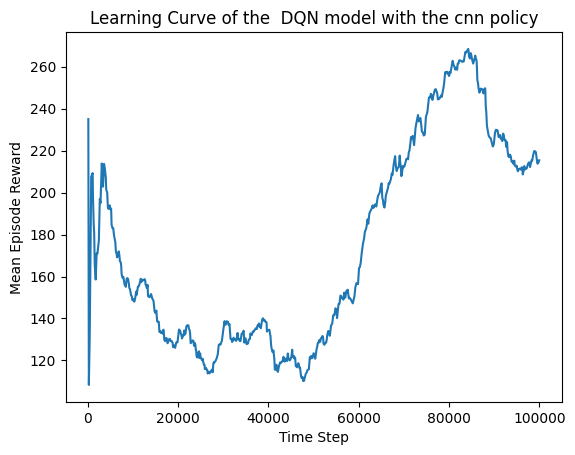

In [ ]:
event_file = log_dir + '/DQN_45'
event_acc = EventAccumulator(event_file)
event_acc.Reload()

# Get the list of available tags (summary keys)
#tags = event_acc.Tags()

# Retrieve the training episode rewards from the event files
episode_rewards = event_acc.Scalars('rollout/ep_rew_mean') # mean episode rewards
step = [episode.step for episode in episode_rewards]
reward = [episode.value for episode in episode_rewards]
### Plot the learning curve
plt.plot(step, reward)
plt.title('Learning Curve of the  DQN model with the cnn policy')
plt.xlabel('Time Step')
plt.ylabel('Mean Episode Reward')

In [ ]:
record_video(env, DQN_policy2,fps = 20, video_length=1000, prefix="dqn-policy2")
show_videos("videos", prefix="dqn-policy2")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving video to /content/drive/MyDrive/data/videos/dqn-policy2-step-0-to-step-1000.mp4
Moviepy - Building video /content/drive/MyDrive/data/videos/dqn-policy2-step-0-to-step-1000.mp4.
Moviepy - Writing video /content/drive/MyDrive/data/videos/dqn-policy2-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/data/videos/dqn-policy2-step-0-to-step-1000.mp4


## Performing some grid searches on this CNN policy with DQN

In [ ]:
# Define the grid of hyperparameters to search over
learning_rates = [1e-2, 1e-3, 1e-4]
gammas = [0.9, 0.95, 0.99]
buffer_sizes = [10000, 50000, 100000]

best_mean_reward = -float('inf')  # Initialize the best mean reward to negative infinity
best_hyperparams = None

# Iterate over all combinations of hyperparameters
for learning_rate in learning_rates:
    for gamma in gammas:
        for buffer_size in buffer_sizes:
            # Create and train the DQN model
            DQN_model = DQN('CnnPolicy', env, verbose=1, tensorboard_log=log_dir,
                            gamma=gamma, learning_rate=learning_rate, buffer_size=buffer_size)
            DQN_model.learn(total_timesteps=20)

            # Evaluate the model on the environment
            mean_reward, _ = evaluate_policy(DQN_model,env, n_eval_episodes=5)

            # If this model's mean reward is the highest found so far, update the best mean reward and best hyperparameters
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                best_hyperparams = (learning_rate, gamma, buffer_size)

# Print the best hyperparameters
print('Best mean reward achieved:', best_mean_reward)
print('Best hyperparameters:', best_hyperparams)

Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to atari_train_log/DQN_47
Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to atari_train_log/DQN_48
Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to atari_train_log/DQN_49
Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to atari_train_log/DQN_50
Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to atari_train_log/DQN_51
Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to atari_train_log/DQN_52
Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to atari_train_log/DQN_53
Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to atari_train_log/DQN_54
Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to atari_train_log/DQN_55
Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to atari_train_log/DQN_56
Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to 

Now implementing the CNN with the hyper parameters:

In [ ]:
learning_rate = 1e-4
gamma = 0.95
buffer_size = 50000
# Instantiate model
DQN_cnn_cv = DQN('CnnPolicy', env, verbose=1, tensorboard_log = log_dir,gamma=gamma, learning_rate=learning_rate, buffer_size=buffer_size)

# Train
DQN_cnn_cv.learn(total_timesteps= 100000)
DQN_cnn_cv.save("dqn_cnn_cv")

Using cuda device

Wrapping the env in a VecTransposeImage.

Logging to atari_train_log/DQN_80

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 649      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.977    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 272      |
|    time_elapsed     | 0        |
|    total_timesteps  | 241      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 674      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.963    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 277      |
|    time_elapsed     | 1        |
|    total_timesteps  | 390      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 572      |
|    ep_rew_mean      | 135      |
|    exploration_rate | 0.95     |
| time/               |          |
|    episodes         | 12       |
|    fps              | 272      |
|    time_elapsed     | 1        |
|    total_timesteps  | 525      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 537      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.939    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 271      |
|    time_elapsed     | 2        |
|    total_timesteps  | 647      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 537      |
|    ep_rew_mean      | 129      |
|    exploration_rate | 0.924    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 271      |
|    time_elapsed     | 2        |
|    total_timesteps  | 805      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 524      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes         | 24       |
|    fps              | 269      |
|    time_elapsed     | 3        |
|    total_timesteps  | 953      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 499      |
|    ep_rew_mean      | 111      |
|    exploration_rate | 0.901    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 267      |
|    time_elapsed     | 3        |
|    total_timesteps  | 1046     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 488      |
|    ep_rew_mean      | 112      |
|    exploration_rate | 0.892    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 266      |
|    time_elapsed     | 4        |
|    total_timesteps  | 1142     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 488      |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.875    |
| time/               |          |
|    episodes         | 36       |
|    fps              | 266      |
|    time_elapsed     | 4        |
|    total_timesteps  | 1317     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 472      |
|    ep_rew_mean      | 95.8     |
|    exploration_rate | 0.865    |
| time/               |          |
|    episodes         | 40       |
|    fps              | 266      |
|    time_elapsed     | 5        |
|    total_timesteps  | 1418     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 489      |
|    ep_rew_mean      | 102      |
|    exploration_rate | 0.844    |
| time/               |          |
|    episodes         | 44       |
|    fps              | 269      |
|    time_elapsed     | 6        |
|    total_timesteps  | 1644     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 496      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.829    |
| time/               |          |
|    episodes         | 48       |
|    fps              | 270      |
|    time_elapsed     | 6        |
|    total_timesteps  | 1798     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 490      |
|    ep_rew_mean      | 102      |
|    exploration_rate | 0.818    |
| time/               |          |
|    episodes         | 52       |
|    fps              | 269      |
|    time_elapsed     | 7        |
|    total_timesteps  | 1921     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 486      |
|    ep_rew_mean      | 98.9     |
|    exploration_rate | 0.805    |
| time/               |          |
|    episodes         | 56       |
|    fps              | 268      |
|    time_elapsed     | 7        |
|    total_timesteps  | 2051     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 482      |
|    ep_rew_mean      | 99.5     |
|    exploration_rate | 0.793    |
| time/               |          |
|    episodes         | 60       |
|    fps              | 253      |
|    time_elapsed     | 8        |
|    total_timesteps  | 2181     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 482      |
|    ep_rew_mean      | 98.1     |
|    exploration_rate | 0.779    |
| time/               |          |
|    episodes         | 64       |
|    fps              | 244      |
|    time_elapsed     | 9        |
|    total_timesteps  | 2328     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 485      |
|    ep_rew_mean      | 99.1     |
|    exploration_rate | 0.766    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 238      |
|    time_elapsed     | 10       |
|    total_timesteps  | 2464     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 486      |
|    ep_rew_mean      | 98.5     |
|    exploration_rate | 0.749    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 231      |
|    time_elapsed     | 11       |
|    total_timesteps  | 2644     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 495      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.729    |
| time/               |          |
|    episodes         | 76       |
|    fps              | 226      |
|    time_elapsed     | 12       |
|    total_timesteps  | 2854     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.718    |
| time/               |          |
|    episodes         | 80       |
|    fps              | 224      |
|    time_elapsed     | 13       |
|    total_timesteps  | 2972     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 488      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.706    |
| time/               |          |
|    episodes         | 84       |
|    fps              | 225      |
|    time_elapsed     | 13       |
|    total_timesteps  | 3097     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 498      |
|    ep_rew_mean      | 108      |
|    exploration_rate | 0.685    |
| time/               |          |
|    episodes         | 88       |
|    fps              | 228      |
|    time_elapsed     | 14       |
|    total_timesteps  | 3319     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 105      |
|    exploration_rate | 0.667    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 231      |
|    time_elapsed     | 15       |
|    total_timesteps  | 3510     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 508      |
|    ep_rew_mean      | 108      |
|    exploration_rate | 0.648    |
| time/               |          |
|    episodes         | 96       |
|    fps              | 233      |
|    time_elapsed     | 15       |
|    total_timesteps  | 3702     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 505      |
|    ep_rew_mean      | 106      |
|    exploration_rate | 0.637    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 234      |
|    time_elapsed     | 16       |
|    total_timesteps  | 3825     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 513      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.607    |
| time/               |          |
|    episodes         | 104      |
|    fps              | 238      |
|    time_elapsed     | 17       |
|    total_timesteps  | 4136     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 516      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.598    |
| time/               |          |
|    episodes         | 108      |
|    fps              | 238      |
|    time_elapsed     | 17       |
|    total_timesteps  | 4233     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 509      |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.591    |
| time/               |          |
|    episodes         | 112      |
|    fps              | 238      |
|    time_elapsed     | 18       |
|    total_timesteps  | 4302     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 504      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.58     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 239      |
|    time_elapsed     | 18       |
|    total_timesteps  | 4425     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 504      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.565    |
| time/               |          |
|    episodes         | 120      |
|    fps              | 239      |
|    time_elapsed     | 19       |
|    total_timesteps  | 4575     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 503      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.552    |
| time/               |          |
|    episodes         | 124      |
|    fps              | 240      |
|    time_elapsed     | 19       |
|    total_timesteps  | 4720     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 502      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.541    |
| time/               |          |
|    episodes         | 128      |
|    fps              | 241      |
|    time_elapsed     | 20       |
|    total_timesteps  | 4830     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 497      |
|    ep_rew_mean      | 114      |
|    exploration_rate | 0.53     |
| time/               |          |
|    episodes         | 132      |
|    fps              | 241      |
|    time_elapsed     | 20       |
|    total_timesteps  | 4951     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 497      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.514    |
| time/               |          |
|    episodes         | 136      |
|    fps              | 242      |
|    time_elapsed     | 21       |
|    total_timesteps  | 5112     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 495      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.503    |
| time/               |          |
|    episodes         | 140      |
|    fps              | 243      |
|    time_elapsed     | 21       |
|    total_timesteps  | 5235     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 501      |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.482    |
| time/               |          |
|    episodes         | 144      |
|    fps              | 244      |
|    time_elapsed     | 22       |
|    total_timesteps  | 5455     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 500      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.469    |
| time/               |          |
|    episodes         | 148      |
|    fps              | 245      |
|    time_elapsed     | 22       |
|    total_timesteps  | 5592     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 502      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.451    |
| time/               |          |
|    episodes         | 152      |
|    fps              | 242      |
|    time_elapsed     | 23       |
|    total_timesteps  | 5781     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 498      |
|    ep_rew_mean      | 114      |
|    exploration_rate | 0.442    |
| time/               |          |
|    episodes         | 156      |
|    fps              | 240      |
|    time_elapsed     | 24       |
|    total_timesteps  | 5873     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 497      |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.43     |
| time/               |          |
|    episodes         | 160      |
|    fps              | 237      |
|    time_elapsed     | 25       |
|    total_timesteps  | 6002     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 495      |
|    ep_rew_mean      | 112      |
|    exploration_rate | 0.413    |
| time/               |          |
|    episodes         | 164      |
|    fps              | 234      |
|    time_elapsed     | 26       |
|    total_timesteps  | 6182     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 501      |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.394    |
| time/               |          |
|    episodes         | 168      |
|    fps              | 232      |
|    time_elapsed     | 27       |
|    total_timesteps  | 6375     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 505      |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.37     |
| time/               |          |
|    episodes         | 172      |
|    fps              | 232      |
|    time_elapsed     | 28       |
|    total_timesteps  | 6627     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 511      |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.355    |
| time/               |          |
|    episodes         | 176      |
|    fps              | 233      |
|    time_elapsed     | 29       |
|    total_timesteps  | 6790     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 515      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.33     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 235      |
|    time_elapsed     | 29       |
|    total_timesteps  | 7048     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 514      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.319    |
| time/               |          |
|    episodes         | 184      |
|    fps              | 235      |
|    time_elapsed     | 30       |
|    total_timesteps  | 7173     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 516      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.291    |
| time/               |          |
|    episodes         | 188      |
|    fps              | 237      |
|    time_elapsed     | 31       |
|    total_timesteps  | 7460     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 520      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.278    |
| time/               |          |
|    episodes         | 192      |
|    fps              | 238      |
|    time_elapsed     | 31       |
|    total_timesteps  | 7598     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 518      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.267    |
| time/               |          |
|    episodes         | 196      |
|    fps              | 238      |
|    time_elapsed     | 32       |
|    total_timesteps  | 7712     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 519      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.247    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 239      |
|    time_elapsed     | 33       |
|    total_timesteps  | 7922     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 519      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.234    |
| time/               |          |
|    episodes         | 204      |
|    fps              | 239      |
|    time_elapsed     | 33       |
|    total_timesteps  | 8059     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 516      |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.225    |
| time/               |          |
|    episodes         | 208      |
|    fps              | 239      |
|    time_elapsed     | 34       |
|    total_timesteps  | 8161     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 515      |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.207    |
| time/               |          |
|    episodes         | 212      |
|    fps              | 240      |
|    time_elapsed     | 34       |
|    total_timesteps  | 8344     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 515      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.195    |
| time/               |          |
|    episodes         | 216      |
|    fps              | 240      |
|    time_elapsed     | 35       |
|    total_timesteps  | 8475     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 518      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.177    |
| time/               |          |
|    episodes         | 220      |
|    fps              | 241      |
|    time_elapsed     | 35       |
|    total_timesteps  | 8663     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 516      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.164    |
| time/               |          |
|    episodes         | 224      |
|    fps              | 242      |
|    time_elapsed     | 36       |
|    total_timesteps  | 8800     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 515      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.152    |
| time/               |          |
|    episodes         | 228      |
|    fps              | 242      |
|    time_elapsed     | 36       |
|    total_timesteps  | 8931     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 515      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.136    |
| time/               |          |
|    episodes         | 232      |
|    fps              | 242      |
|    time_elapsed     | 37       |
|    total_timesteps  | 9094     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 514      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.123    |
| time/               |          |
|    episodes         | 236      |
|    fps              | 242      |
|    time_elapsed     | 38       |
|    total_timesteps  | 9230     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 511      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.115    |
| time/               |          |
|    episodes         | 240      |
|    fps              | 241      |
|    time_elapsed     | 38       |
|    total_timesteps  | 9313     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 512      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.087    |
| time/               |          |
|    episodes         | 244      |
|    fps              | 238      |
|    time_elapsed     | 40       |
|    total_timesteps  | 9611     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 517      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.0631   |
| time/               |          |
|    episodes         | 248      |
|    fps              | 236      |
|    time_elapsed     | 41       |
|    total_timesteps  | 9862     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 522      |
|    ep_rew_mean      | 133      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 252      |
|    fps              | 234      |
|    time_elapsed     | 42       |
|    total_timesteps  | 10029    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 526      |
|    ep_rew_mean      | 134      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 256      |
|    fps              | 235      |
|    time_elapsed     | 43       |
|    total_timesteps  | 10244    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 527      |
|    ep_rew_mean      | 135      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 260      |
|    fps              | 236      |
|    time_elapsed     | 44       |
|    total_timesteps  | 10477    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 528      |
|    ep_rew_mean      | 134      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 236      |
|    time_elapsed     | 44       |
|    total_timesteps  | 10620    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 529      |
|    ep_rew_mean      | 135      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 237      |
|    time_elapsed     | 45       |
|    total_timesteps  | 10796    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 532      |
|    ep_rew_mean      | 135      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 237      |
|    time_elapsed     | 46       |
|    total_timesteps  | 10991    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 534      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 276      |
|    fps              | 238      |
|    time_elapsed     | 47       |
|    total_timesteps  | 11234    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 534      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 280      |
|    fps              | 239      |
|    time_elapsed     | 47       |
|    total_timesteps  | 11394    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 532      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 284      |
|    fps              | 239      |
|    time_elapsed     | 48       |
|    total_timesteps  | 11524    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 529      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 288      |
|    fps              | 239      |
|    time_elapsed     | 48       |
|    total_timesteps  | 11608    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 526      |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 292      |
|    fps              | 239      |
|    time_elapsed     | 49       |
|    total_timesteps  | 11758    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 528      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 296      |
|    fps              | 240      |
|    time_elapsed     | 49       |
|    total_timesteps  | 11866    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 527      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 300      |
|    fps              | 240      |
|    time_elapsed     | 50       |
|    total_timesteps  | 12024    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 526      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 304      |
|    fps              | 240      |
|    time_elapsed     | 50       |
|    total_timesteps  | 12198    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 523      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 308      |
|    fps              | 241      |
|    time_elapsed     | 51       |
|    total_timesteps  | 12326    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 523      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 312      |
|    fps              | 241      |
|    time_elapsed     | 51       |
|    total_timesteps  | 12471    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 523      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 316      |
|    fps              | 241      |
|    time_elapsed     | 52       |
|    total_timesteps  | 12562    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 522      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 320      |
|    fps              | 241      |
|    time_elapsed     | 52       |
|    total_timesteps  | 12737    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 521      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 240      |
|    time_elapsed     | 53       |
|    total_timesteps  | 12842    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 522      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 239      |
|    time_elapsed     | 54       |
|    total_timesteps  | 12957    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 522      |
|    ep_rew_mean      | 137      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 237      |
|    time_elapsed     | 55       |
|    total_timesteps  | 13113    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 526      |
|    ep_rew_mean      | 141      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 336      |
|    fps              | 236      |
|    time_elapsed     | 56       |
|    total_timesteps  | 13345    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 531      |
|    ep_rew_mean      | 144      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 340      |
|    fps              | 235      |
|    time_elapsed     | 57       |
|    total_timesteps  | 13623    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 531      |
|    ep_rew_mean      | 144      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 344      |
|    fps              | 236      |
|    time_elapsed     | 58       |
|    total_timesteps  | 13760    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 533      |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 348      |
|    fps              | 236      |
|    time_elapsed     | 59       |
|    total_timesteps  | 13985    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 531      |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 352      |
|    fps              | 236      |
|    time_elapsed     | 59       |
|    total_timesteps  | 14072    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 535      |
|    ep_rew_mean      | 147      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 237      |
|    time_elapsed     | 60       |
|    total_timesteps  | 14279    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 534      |
|    ep_rew_mean      | 147      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 237      |
|    time_elapsed     | 60       |
|    total_timesteps  | 14395    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 538      |
|    ep_rew_mean      | 148      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 364      |
|    fps              | 238      |
|    time_elapsed     | 61       |
|    total_timesteps  | 14723    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 539      |
|    ep_rew_mean      | 149      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 368      |
|    fps              | 238      |
|    time_elapsed     | 62       |
|    total_timesteps  | 14803    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 537      |
|    ep_rew_mean      | 148      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 372      |
|    fps              | 238      |
|    time_elapsed     | 62       |
|    total_timesteps  | 14917    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 538      |
|    ep_rew_mean      | 148      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 376      |
|    fps              | 239      |
|    time_elapsed     | 63       |
|    total_timesteps  | 15194    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 539      |
|    ep_rew_mean      | 148      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 380      |
|    fps              | 239      |
|    time_elapsed     | 63       |
|    total_timesteps  | 15274    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 536      |
|    ep_rew_mean      | 147      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 384      |
|    fps              | 239      |
|    time_elapsed     | 64       |
|    total_timesteps  | 15359    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 532      |
|    ep_rew_mean      | 144      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 388      |
|    fps              | 239      |
|    time_elapsed     | 64       |
|    total_timesteps  | 15474    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 534      |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 392      |
|    fps              | 239      |
|    time_elapsed     | 65       |
|    total_timesteps  | 15619    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 527      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 396      |
|    fps              | 239      |
|    time_elapsed     | 65       |
|    total_timesteps  | 15735    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 528      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 400      |
|    fps              | 240      |
|    time_elapsed     | 66       |
|    total_timesteps  | 15888    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 525      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 404      |
|    fps              | 240      |
|    time_elapsed     | 66       |
|    total_timesteps  | 16037    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 522      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 408      |
|    fps              | 240      |
|    time_elapsed     | 67       |
|    total_timesteps  | 16136    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 522      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 412      |
|    fps              | 240      |
|    time_elapsed     | 67       |
|    total_timesteps  | 16225    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 526      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 416      |
|    fps              | 239      |
|    time_elapsed     | 68       |
|    total_timesteps  | 16452    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 524      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 420      |
|    fps              | 238      |
|    time_elapsed     | 69       |
|    total_timesteps  | 16555    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 524      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 424      |
|    fps              | 237      |
|    time_elapsed     | 70       |
|    total_timesteps  | 16686    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 522      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 428      |
|    fps              | 236      |
|    time_elapsed     | 71       |
|    total_timesteps  | 16813    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 525      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 235      |
|    time_elapsed     | 71       |
|    total_timesteps  | 16951    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 525      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 235      |
|    time_elapsed     | 72       |
|    total_timesteps  | 17106    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 526      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 235      |
|    time_elapsed     | 73       |
|    total_timesteps  | 17278    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 524      |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 236      |
|    time_elapsed     | 73       |
|    total_timesteps  | 17434    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 523      |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 448      |
|    fps              | 236      |
|    time_elapsed     | 74       |
|    total_timesteps  | 17560    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 521      |
|    ep_rew_mean      | 141      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 452      |
|    fps              | 236      |
|    time_elapsed     | 74       |
|    total_timesteps  | 17643    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 522      |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 456      |
|    fps              | 236      |
|    time_elapsed     | 75       |
|    total_timesteps  | 17781    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 522      |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 460      |
|    fps              | 236      |
|    time_elapsed     | 75       |
|    total_timesteps  | 17928    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 522      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 464      |
|    fps              | 236      |
|    time_elapsed     | 76       |
|    total_timesteps  | 18041    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 518      |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 468      |
|    fps              | 237      |
|    time_elapsed     | 76       |
|    total_timesteps  | 18191    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 515      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 472      |
|    fps              | 237      |
|    time_elapsed     | 77       |
|    total_timesteps  | 18324    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 512      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 476      |
|    fps              | 237      |
|    time_elapsed     | 77       |
|    total_timesteps  | 18540    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 512      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 480      |
|    fps              | 237      |
|    time_elapsed     | 78       |
|    total_timesteps  | 18711    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 512      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 484      |
|    fps              | 237      |
|    time_elapsed     | 79       |
|    total_timesteps  | 18860    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 510      |
|    ep_rew_mean      | 137      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 488      |
|    fps              | 237      |
|    time_elapsed     | 79       |
|    total_timesteps  | 18970    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 507      |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 492      |
|    fps              | 237      |
|    time_elapsed     | 80       |
|    total_timesteps  | 19150    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 508      |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 496      |
|    fps              | 237      |
|    time_elapsed     | 81       |
|    total_timesteps  | 19297    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 506      |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 500      |
|    fps              | 237      |
|    time_elapsed     | 81       |
|    total_timesteps  | 19400    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 504      |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 504      |
|    fps              | 237      |
|    time_elapsed     | 82       |
|    total_timesteps  | 19520    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 506      |
|    ep_rew_mean      | 137      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 508      |
|    fps              | 237      |
|    time_elapsed     | 82       |
|    total_timesteps  | 19641    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 504      |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 512      |
|    fps              | 236      |
|    time_elapsed     | 84       |
|    total_timesteps  | 19841    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 508      |
|    ep_rew_mean      | 137      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 516      |
|    fps              | 235      |
|    time_elapsed     | 85       |
|    total_timesteps  | 20027    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 509      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 520      |
|    fps              | 234      |
|    time_elapsed     | 86       |
|    total_timesteps  | 20277    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 510      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 524      |
|    fps              | 234      |
|    time_elapsed     | 86       |
|    total_timesteps  | 20358    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 511      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 528      |
|    fps              | 234      |
|    time_elapsed     | 87       |
|    total_timesteps  | 20556    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 512      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 234      |
|    time_elapsed     | 88       |
|    total_timesteps  | 20709    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 510      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 234      |
|    time_elapsed     | 88       |
|    total_timesteps  | 20793    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 515      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 234      |
|    time_elapsed     | 89       |
|    total_timesteps  | 21021    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 513      |
|    ep_rew_mean      | 137      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 544      |
|    fps              | 235      |
|    time_elapsed     | 90       |
|    total_timesteps  | 21183    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 512      |
|    ep_rew_mean      | 137      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 548      |
|    fps              | 235      |
|    time_elapsed     | 90       |
|    total_timesteps  | 21371    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 507      |
|    ep_rew_mean      | 130      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 552      |
|    fps              | 235      |
|    time_elapsed     | 91       |
|    total_timesteps  | 21535    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 503      |
|    ep_rew_mean      | 128      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 556      |
|    fps              | 235      |
|    time_elapsed     | 91       |
|    total_timesteps  | 21635    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 500      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 560      |
|    fps              | 235      |
|    time_elapsed     | 92       |
|    total_timesteps  | 21728    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 497      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 564      |
|    fps              | 236      |
|    time_elapsed     | 92       |
|    total_timesteps  | 21872    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 496      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 568      |
|    fps              | 236      |
|    time_elapsed     | 93       |
|    total_timesteps  | 22049    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 494      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 572      |
|    fps              | 236      |
|    time_elapsed     | 93       |
|    total_timesteps  | 22192    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 576      |
|    fps              | 236      |
|    time_elapsed     | 94       |
|    total_timesteps  | 22372    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 490      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 580      |
|    fps              | 237      |
|    time_elapsed     | 94       |
|    total_timesteps  | 22480    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 490      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 584      |
|    fps              | 237      |
|    time_elapsed     | 95       |
|    total_timesteps  | 22577    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 588      |
|    fps              | 237      |
|    time_elapsed     | 95       |
|    total_timesteps  | 22737    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 495      |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 592      |
|    fps              | 237      |
|    time_elapsed     | 96       |
|    total_timesteps  | 22915    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 493      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 596      |
|    fps              | 237      |
|    time_elapsed     | 96       |
|    total_timesteps  | 23035    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 493      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 600      |
|    fps              | 236      |
|    time_elapsed     | 97       |
|    total_timesteps  | 23192    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 604      |
|    fps              | 235      |
|    time_elapsed     | 98       |
|    total_timesteps  | 23347    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 493      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 608      |
|    fps              | 235      |
|    time_elapsed     | 99       |
|    total_timesteps  | 23456    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 493      |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 612      |
|    fps              | 234      |
|    time_elapsed     | 100      |
|    total_timesteps  | 23627    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 495      |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 616      |
|    fps              | 234      |
|    time_elapsed     | 101      |
|    total_timesteps  | 23807    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 496      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 620      |
|    fps              | 234      |
|    time_elapsed     | 102      |
|    total_timesteps  | 23931    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 502      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 624      |
|    fps              | 234      |
|    time_elapsed     | 103      |
|    total_timesteps  | 24224    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 502      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 628      |
|    fps              | 235      |
|    time_elapsed     | 103      |
|    total_timesteps  | 24360    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 504      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 632      |
|    fps              | 235      |
|    time_elapsed     | 104      |
|    total_timesteps  | 24555    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 503      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 636      |
|    fps              | 235      |
|    time_elapsed     | 105      |
|    total_timesteps  | 24757    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 500      |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 640      |
|    fps              | 235      |
|    time_elapsed     | 105      |
|    total_timesteps  | 24897    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 497      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 644      |
|    fps              | 235      |
|    time_elapsed     | 105      |
|    total_timesteps  | 25009    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 495      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 236      |
|    time_elapsed     | 106      |
|    total_timesteps  | 25189    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 496      |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 652      |
|    fps              | 236      |
|    time_elapsed     | 107      |
|    total_timesteps  | 25372    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 495      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 656      |
|    fps              | 236      |
|    time_elapsed     | 107      |
|    total_timesteps  | 25491    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 494      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 660      |
|    fps              | 236      |
|    time_elapsed     | 108      |
|    total_timesteps  | 25591    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 664      |
|    fps              | 236      |
|    time_elapsed     | 108      |
|    total_timesteps  | 25746    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 493      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 668      |
|    fps              | 236      |
|    time_elapsed     | 109      |
|    total_timesteps  | 25973    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 495      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 672      |
|    fps              | 237      |
|    time_elapsed     | 110      |
|    total_timesteps  | 26108    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 676      |
|    fps              | 237      |
|    time_elapsed     | 110      |
|    total_timesteps  | 26238    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 489      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 680      |
|    fps              | 237      |
|    time_elapsed     | 110      |
|    total_timesteps  | 26336    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 684      |
|    fps              | 237      |
|    time_elapsed     | 111      |
|    total_timesteps  | 26449    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 688      |
|    fps              | 237      |
|    time_elapsed     | 112      |
|    total_timesteps  | 26600    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 692      |
|    fps              | 236      |
|    time_elapsed     | 113      |
|    total_timesteps  | 26747    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 493      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 696      |
|    fps              | 236      |
|    time_elapsed     | 113      |
|    total_timesteps  | 26897    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 700      |
|    fps              | 235      |
|    time_elapsed     | 114      |
|    total_timesteps  | 26994    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 704      |
|    fps              | 235      |
|    time_elapsed     | 115      |
|    total_timesteps  | 27121    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 708      |
|    fps              | 234      |
|    time_elapsed     | 116      |
|    total_timesteps  | 27267    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 493      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 712      |
|    fps              | 234      |
|    time_elapsed     | 116      |
|    total_timesteps  | 27377    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 490      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 716      |
|    fps              | 234      |
|    time_elapsed     | 117      |
|    total_timesteps  | 27542    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 490      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 720      |
|    fps              | 234      |
|    time_elapsed     | 117      |
|    total_timesteps  | 27645    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 488      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 724      |
|    fps              | 234      |
|    time_elapsed     | 118      |
|    total_timesteps  | 27744    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 493      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 728      |
|    fps              | 235      |
|    time_elapsed     | 118      |
|    total_timesteps  | 27939    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 732      |
|    fps              | 235      |
|    time_elapsed     | 119      |
|    total_timesteps  | 28049    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 736      |
|    fps              | 235      |
|    time_elapsed     | 119      |
|    total_timesteps  | 28218    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 494      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 740      |
|    fps              | 235      |
|    time_elapsed     | 120      |
|    total_timesteps  | 28417    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 744      |
|    fps              | 235      |
|    time_elapsed     | 120      |
|    total_timesteps  | 28515    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 493      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 748      |
|    fps              | 236      |
|    time_elapsed     | 121      |
|    total_timesteps  | 28684    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 752      |
|    fps              | 236      |
|    time_elapsed     | 121      |
|    total_timesteps  | 28771    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 756      |
|    fps              | 236      |
|    time_elapsed     | 122      |
|    total_timesteps  | 28913    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 760      |
|    fps              | 236      |
|    time_elapsed     | 122      |
|    total_timesteps  | 29026    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 764      |
|    fps              | 236      |
|    time_elapsed     | 123      |
|    total_timesteps  | 29171    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 768      |
|    fps              | 236      |
|    time_elapsed     | 123      |
|    total_timesteps  | 29293    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 496      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 772      |
|    fps              | 237      |
|    time_elapsed     | 124      |
|    total_timesteps  | 29576    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 495      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 776      |
|    fps              | 237      |
|    time_elapsed     | 125      |
|    total_timesteps  | 29679    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 780      |
|    fps              | 237      |
|    time_elapsed     | 125      |
|    total_timesteps  | 29819    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 489      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 784      |
|    fps              | 237      |
|    time_elapsed     | 126      |
|    total_timesteps  | 29917    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 788      |
|    fps              | 237      |
|    time_elapsed     | 126      |
|    total_timesteps  | 30110    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 792      |
|    fps              | 236      |
|    time_elapsed     | 127      |
|    total_timesteps  | 30258    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 490      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 796      |
|    fps              | 235      |
|    time_elapsed     | 129      |
|    total_timesteps  | 30376    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 489      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 800      |
|    fps              | 233      |
|    time_elapsed     | 130      |
|    total_timesteps  | 30473    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 489      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 804      |
|    fps              | 232      |
|    time_elapsed     | 131      |
|    total_timesteps  | 30583    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 808      |
|    fps              | 233      |
|    time_elapsed     | 131      |
|    total_timesteps  | 30747    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 495      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 812      |
|    fps              | 233      |
|    time_elapsed     | 132      |
|    total_timesteps  | 30937    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 489      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 816      |
|    fps              | 233      |
|    time_elapsed     | 133      |
|    total_timesteps  | 31088    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 487      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 820      |
|    fps              | 233      |
|    time_elapsed     | 133      |
|    total_timesteps  | 31260    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 488      |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 824      |
|    fps              | 233      |
|    time_elapsed     | 134      |
|    total_timesteps  | 31452    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 485      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 828      |
|    fps              | 233      |
|    time_elapsed     | 134      |
|    total_timesteps  | 31529    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 484      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 832      |
|    fps              | 234      |
|    time_elapsed     | 135      |
|    total_timesteps  | 31692    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 487      |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 836      |
|    fps              | 234      |
|    time_elapsed     | 135      |
|    total_timesteps  | 31861    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 483      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 840      |
|    fps              | 234      |
|    time_elapsed     | 136      |
|    total_timesteps  | 31956    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 483      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 844      |
|    fps              | 234      |
|    time_elapsed     | 136      |
|    total_timesteps  | 32076    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 478      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 848      |
|    fps              | 234      |
|    time_elapsed     | 137      |
|    total_timesteps  | 32162    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 476      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 852      |
|    fps              | 234      |
|    time_elapsed     | 137      |
|    total_timesteps  | 32294    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 477      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 856      |
|    fps              | 234      |
|    time_elapsed     | 138      |
|    total_timesteps  | 32446    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 482      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 860      |
|    fps              | 235      |
|    time_elapsed     | 139      |
|    total_timesteps  | 32708    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 486      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 864      |
|    fps              | 235      |
|    time_elapsed     | 139      |
|    total_timesteps  | 32865    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 485      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 868      |
|    fps              | 235      |
|    time_elapsed     | 140      |
|    total_timesteps  | 32991    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 483      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 872      |
|    fps              | 235      |
|    time_elapsed     | 140      |
|    total_timesteps  | 33128    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 483      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 876      |
|    fps              | 235      |
|    time_elapsed     | 141      |
|    total_timesteps  | 33294    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 482      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 880      |
|    fps              | 235      |
|    time_elapsed     | 141      |
|    total_timesteps  | 33389    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 486      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 884      |
|    fps              | 234      |
|    time_elapsed     | 143      |
|    total_timesteps  | 33606    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 489      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 888      |
|    fps              | 234      |
|    time_elapsed     | 144      |
|    total_timesteps  | 33829    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 490      |
|    ep_rew_mean      | 127      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 892      |
|    fps              | 233      |
|    time_elapsed     | 145      |
|    total_timesteps  | 33997    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 128      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 896      |
|    fps              | 233      |
|    time_elapsed     | 146      |
|    total_timesteps  | 34255    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 494      |
|    ep_rew_mean      | 129      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 900      |
|    fps              | 233      |
|    time_elapsed     | 147      |
|    total_timesteps  | 34398    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 129      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 904      |
|    fps              | 233      |
|    time_elapsed     | 147      |
|    total_timesteps  | 34512    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 491      |
|    ep_rew_mean      | 129      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 908      |
|    fps              | 234      |
|    time_elapsed     | 147      |
|    total_timesteps  | 34642    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 493      |
|    ep_rew_mean      | 129      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 912      |
|    fps              | 234      |
|    time_elapsed     | 148      |
|    total_timesteps  | 34808    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 497      |
|    ep_rew_mean      | 130      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 916      |
|    fps              | 234      |
|    time_elapsed     | 149      |
|    total_timesteps  | 35088    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 500      |
|    ep_rew_mean      | 133      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 920      |
|    fps              | 234      |
|    time_elapsed     | 150      |
|    total_timesteps  | 35332    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 496      |
|    ep_rew_mean      | 127      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 924      |
|    fps              | 234      |
|    time_elapsed     | 151      |
|    total_timesteps  | 35531    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 496      |
|    ep_rew_mean      | 128      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 928      |
|    fps              | 235      |
|    time_elapsed     | 151      |
|    total_timesteps  | 35626    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 932      |
|    fps              | 235      |
|    time_elapsed     | 152      |
|    total_timesteps  | 35745    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 488      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 936      |
|    fps              | 235      |
|    time_elapsed     | 152      |
|    total_timesteps  | 35837    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 486      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 940      |
|    fps              | 235      |
|    time_elapsed     | 152      |
|    total_timesteps  | 35918    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 487      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 944      |
|    fps              | 235      |
|    time_elapsed     | 153      |
|    total_timesteps  | 36069    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 483      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 948      |
|    fps              | 235      |
|    time_elapsed     | 153      |
|    total_timesteps  | 36147    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 483      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 952      |
|    fps              | 235      |
|    time_elapsed     | 154      |
|    total_timesteps  | 36332    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 487      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 956      |
|    fps              | 235      |
|    time_elapsed     | 155      |
|    total_timesteps  | 36544    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 488      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 960      |
|    fps              | 235      |
|    time_elapsed     | 155      |
|    total_timesteps  | 36677    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 487      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 964      |
|    fps              | 235      |
|    time_elapsed     | 156      |
|    total_timesteps  | 36884    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 484      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 968      |
|    fps              | 235      |
|    time_elapsed     | 157      |
|    total_timesteps  | 36998    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 485      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 972      |
|    fps              | 234      |
|    time_elapsed     | 158      |
|    total_timesteps  | 37167    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 485      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 976      |
|    fps              | 234      |
|    time_elapsed     | 158      |
|    total_timesteps  | 37273    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 487      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 980      |
|    fps              | 234      |
|    time_elapsed     | 159      |
|    total_timesteps  | 37423    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 490      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 984      |
|    fps              | 233      |
|    time_elapsed     | 160      |
|    total_timesteps  | 37623    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 489      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 988      |
|    fps              | 233      |
|    time_elapsed     | 161      |
|    total_timesteps  | 37719    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 992      |
|    fps              | 234      |
|    time_elapsed     | 162      |
|    total_timesteps  | 37954    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 492      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 996      |
|    fps              | 234      |
|    time_elapsed     | 162      |
|    total_timesteps  | 38107    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 497      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 234      |
|    time_elapsed     | 163      |
|    total_timesteps  | 38334    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 500      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1004     |
|    fps              | 234      |
|    time_elapsed     | 164      |
|    total_timesteps  | 38530    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 498      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1008     |
|    fps              | 234      |
|    time_elapsed     | 164      |
|    total_timesteps  | 38684    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 501      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1012     |
|    fps              | 234      |
|    time_elapsed     | 165      |
|    total_timesteps  | 38822    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 503      |
|    ep_rew_mean      | 128      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1016     |
|    fps              | 235      |
|    time_elapsed     | 166      |
|    total_timesteps  | 39038    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 506      |
|    ep_rew_mean      | 129      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1020     |
|    fps              | 235      |
|    time_elapsed     | 166      |
|    total_timesteps  | 39193    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 510      |
|    ep_rew_mean      | 130      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1024     |
|    fps              | 235      |
|    time_elapsed     | 167      |
|    total_timesteps  | 39389    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 509      |
|    ep_rew_mean      | 131      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1028     |
|    fps              | 235      |
|    time_elapsed     | 167      |
|    total_timesteps  | 39574    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 510      |
|    ep_rew_mean      | 131      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1032     |
|    fps              | 235      |
|    time_elapsed     | 168      |
|    total_timesteps  | 39722    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 508      |
|    ep_rew_mean      | 130      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1036     |
|    fps              | 235      |
|    time_elapsed     | 168      |
|    total_timesteps  | 39820    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 506      |
|    ep_rew_mean      | 128      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1040     |
|    fps              | 235      |
|    time_elapsed     | 169      |
|    total_timesteps  | 39969    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 504      |
|    ep_rew_mean      | 129      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1044     |
|    fps              | 235      |
|    time_elapsed     | 169      |
|    total_timesteps  | 40062    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 504      |
|    ep_rew_mean      | 129      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1048     |
|    fps              | 236      |
|    time_elapsed     | 170      |
|    total_timesteps  | 40194    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 506      |
|    ep_rew_mean      | 131      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1052     |
|    fps              | 236      |
|    time_elapsed     | 171      |
|    total_timesteps  | 40383    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 507      |
|    ep_rew_mean      | 131      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1056     |
|    fps              | 235      |
|    time_elapsed     | 171      |
|    total_timesteps  | 40508    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 512      |
|    ep_rew_mean      | 132      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1060     |
|    fps              | 235      |
|    time_elapsed     | 173      |
|    total_timesteps  | 40737    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 512      |
|    ep_rew_mean      | 133      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1064     |
|    fps              | 234      |
|    time_elapsed     | 174      |
|    total_timesteps  | 40874    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 513      |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1068     |
|    fps              | 234      |
|    time_elapsed     | 175      |
|    total_timesteps  | 41063    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 508      |
|    ep_rew_mean      | 128      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1072     |
|    fps              | 234      |
|    time_elapsed     | 175      |
|    total_timesteps  | 41154    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 512      |
|    ep_rew_mean      | 129      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1076     |
|    fps              | 234      |
|    time_elapsed     | 176      |
|    total_timesteps  | 41380    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 510      |
|    ep_rew_mean      | 128      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1080     |
|    fps              | 234      |
|    time_elapsed     | 177      |
|    total_timesteps  | 41599    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 516      |
|    ep_rew_mean      | 130      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1084     |
|    fps              | 234      |
|    time_elapsed     | 177      |
|    total_timesteps  | 41805    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 518      |
|    ep_rew_mean      | 130      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1088     |
|    fps              | 235      |
|    time_elapsed     | 178      |
|    total_timesteps  | 42004    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 519      |
|    ep_rew_mean      | 130      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1092     |
|    fps              | 235      |
|    time_elapsed     | 179      |
|    total_timesteps  | 42148    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 521      |
|    ep_rew_mean      | 132      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1096     |
|    fps              | 235      |
|    time_elapsed     | 180      |
|    total_timesteps  | 42415    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 529      |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1100     |
|    fps              | 235      |
|    time_elapsed     | 180      |
|    total_timesteps  | 42595    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 530      |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1104     |
|    fps              | 235      |
|    time_elapsed     | 181      |
|    total_timesteps  | 42751    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 530      |
|    ep_rew_mean      | 137      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1108     |
|    fps              | 235      |
|    time_elapsed     | 181      |
|    total_timesteps  | 42914    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 529      |
|    ep_rew_mean      | 137      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1112     |
|    fps              | 236      |
|    time_elapsed     | 182      |
|    total_timesteps  | 43114    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 534      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1116     |
|    fps              | 236      |
|    time_elapsed     | 183      |
|    total_timesteps  | 43339    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 530      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1120     |
|    fps              | 236      |
|    time_elapsed     | 183      |
|    total_timesteps  | 43448    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 532      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1124     |
|    fps              | 236      |
|    time_elapsed     | 184      |
|    total_timesteps  | 43644    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 536      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1128     |
|    fps              | 236      |
|    time_elapsed     | 185      |
|    total_timesteps  | 43822    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 536      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1132     |
|    fps              | 236      |
|    time_elapsed     | 185      |
|    total_timesteps  | 43948    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 533      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1136     |
|    fps              | 236      |
|    time_elapsed     | 186      |
|    total_timesteps  | 44096    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 534      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1140     |
|    fps              | 235      |
|    time_elapsed     | 187      |
|    total_timesteps  | 44217    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 534      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1144     |
|    fps              | 235      |
|    time_elapsed     | 188      |
|    total_timesteps  | 44393    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 542      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1148     |
|    fps              | 234      |
|    time_elapsed     | 189      |
|    total_timesteps  | 44609    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 542      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1152     |
|    fps              | 234      |
|    time_elapsed     | 190      |
|    total_timesteps  | 44759    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 542      |
|    ep_rew_mean      | 144      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1156     |
|    fps              | 235      |
|    time_elapsed     | 191      |
|    total_timesteps  | 44980    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 539      |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1160     |
|    fps              | 235      |
|    time_elapsed     | 191      |
|    total_timesteps  | 45117    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 538      |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1164     |
|    fps              | 235      |
|    time_elapsed     | 192      |
|    total_timesteps  | 45263    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 540      |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1168     |
|    fps              | 235      |
|    time_elapsed     | 192      |
|    total_timesteps  | 45412    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 548      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1172     |
|    fps              | 235      |
|    time_elapsed     | 194      |
|    total_timesteps  | 45726    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 546      |
|    ep_rew_mean      | 144      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1176     |
|    fps              | 235      |
|    time_elapsed     | 194      |
|    total_timesteps  | 45883    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 548      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1180     |
|    fps              | 235      |
|    time_elapsed     | 195      |
|    total_timesteps  | 46009    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 542      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1184     |
|    fps              | 235      |
|    time_elapsed     | 195      |
|    total_timesteps  | 46087    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 542      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1188     |
|    fps              | 236      |
|    time_elapsed     | 196      |
|    total_timesteps  | 46279    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 539      |
|    ep_rew_mean      | 141      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1192     |
|    fps              | 236      |
|    time_elapsed     | 196      |
|    total_timesteps  | 46429    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 536      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1196     |
|    fps              | 236      |
|    time_elapsed     | 197      |
|    total_timesteps  | 46560    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 534      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1200     |
|    fps              | 236      |
|    time_elapsed     | 197      |
|    total_timesteps  | 46731    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 538      |
|    ep_rew_mean      | 141      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1204     |
|    fps              | 236      |
|    time_elapsed     | 198      |
|    total_timesteps  | 46876    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 541      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1208     |
|    fps              | 236      |
|    time_elapsed     | 199      |
|    total_timesteps  | 47089    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 538      |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1212     |
|    fps              | 236      |
|    time_elapsed     | 199      |
|    total_timesteps  | 47239    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 533      |
|    ep_rew_mean      | 141      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1216     |
|    fps              | 236      |
|    time_elapsed     | 200      |
|    total_timesteps  | 47384    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 531      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1220     |
|    fps              | 236      |
|    time_elapsed     | 200      |
|    total_timesteps  | 47498    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 529      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1224     |
|    fps              | 236      |
|    time_elapsed     | 201      |
|    total_timesteps  | 47666    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 534      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1228     |
|    fps              | 235      |
|    time_elapsed     | 202      |
|    total_timesteps  | 47876    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 537      |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1232     |
|    fps              | 235      |
|    time_elapsed     | 204      |
|    total_timesteps  | 48076    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 543      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1236     |
|    fps              | 235      |
|    time_elapsed     | 205      |
|    total_timesteps  | 48318    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 544      |
|    ep_rew_mean      | 144      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1240     |
|    fps              | 235      |
|    time_elapsed     | 205      |
|    total_timesteps  | 48444    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 551      |
|    ep_rew_mean      | 147      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1244     |
|    fps              | 235      |
|    time_elapsed     | 206      |
|    total_timesteps  | 48745    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 551      |
|    ep_rew_mean      | 147      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1248     |
|    fps              | 235      |
|    time_elapsed     | 207      |
|    total_timesteps  | 48878    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 552      |
|    ep_rew_mean      | 151      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1252     |
|    fps              | 235      |
|    time_elapsed     | 207      |
|    total_timesteps  | 49025    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 551      |
|    ep_rew_mean      | 151      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1256     |
|    fps              | 236      |
|    time_elapsed     | 208      |
|    total_timesteps  | 49222    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 552      |
|    ep_rew_mean      | 150      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1260     |
|    fps              | 236      |
|    time_elapsed     | 209      |
|    total_timesteps  | 49387    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 553      |
|    ep_rew_mean      | 151      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1264     |
|    fps              | 236      |
|    time_elapsed     | 210      |
|    total_timesteps  | 49662    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 558      |
|    ep_rew_mean      | 154      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1268     |
|    fps              | 236      |
|    time_elapsed     | 210      |
|    total_timesteps  | 49825    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 555      |
|    ep_rew_mean      | 153      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1272     |
|    fps              | 236      |
|    time_elapsed     | 211      |
|    total_timesteps  | 49922    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 554      |
|    ep_rew_mean      | 153      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1276     |
|    fps              | 236      |
|    time_elapsed     | 211      |
|    total_timesteps  | 50013    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0332   |
|    n_updates        | 3        |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 555      |
|    ep_rew_mean      | 153      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1280     |
|    fps              | 236      |
|    time_elapsed     | 212      |
|    total_timesteps  | 50194    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0152   |
|    n_updates        | 48       |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 555      |
|    ep_rew_mean      | 153      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1284     |
|    fps              | 235      |
|    time_elapsed     | 214      |
|    total_timesteps  | 50441    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0166   |
|    n_updates        | 110      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 558      |
|    ep_rew_mean      | 153      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1288     |
|    fps              | 235      |
|    time_elapsed     | 215      |
|    total_timesteps  | 50566    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0289   |
|    n_updates        | 141      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 558      |
|    ep_rew_mean      | 152      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1292     |
|    fps              | 233      |
|    time_elapsed     | 217      |
|    total_timesteps  | 50798    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0701   |
|    n_updates        | 199      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 562      |
|    ep_rew_mean      | 152      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1296     |
|    fps              | 232      |
|    time_elapsed     | 219      |
|    total_timesteps  | 51037    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00304  |
|    n_updates        | 259      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 559      |
|    ep_rew_mean      | 148      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1300     |
|    fps              | 231      |
|    time_elapsed     | 220      |
|    total_timesteps  | 51161    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0426   |
|    n_updates        | 290      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 557      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1304     |
|    fps              | 231      |
|    time_elapsed     | 221      |
|    total_timesteps  | 51325    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0566   |
|    n_updates        | 331      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 559      |
|    ep_rew_mean      | 147      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1308     |
|    fps              | 230      |
|    time_elapsed     | 223      |
|    total_timesteps  | 51593    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0392   |
|    n_updates        | 398      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 564      |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1312     |
|    fps              | 230      |
|    time_elapsed     | 224      |
|    total_timesteps  | 51776    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0668   |
|    n_updates        | 443      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 564      |
|    ep_rew_mean      | 147      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1316     |
|    fps              | 230      |
|    time_elapsed     | 226      |
|    total_timesteps  | 52018    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0274   |
|    n_updates        | 504      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 563      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1320     |
|    fps              | 229      |
|    time_elapsed     | 227      |
|    total_timesteps  | 52161    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0154   |
|    n_updates        | 540      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 561      |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1324     |
|    fps              | 229      |
|    time_elapsed     | 228      |
|    total_timesteps  | 52312    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.017    |
|    n_updates        | 577      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 565      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1328     |
|    fps              | 228      |
|    time_elapsed     | 229      |
|    total_timesteps  | 52560    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0178   |
|    n_updates        | 639      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 566      |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1332     |
|    fps              | 227      |
|    time_elapsed     | 231      |
|    total_timesteps  | 52757    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00385  |
|    n_updates        | 689      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 568      |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1336     |
|    fps              | 226      |
|    time_elapsed     | 233      |
|    total_timesteps  | 52927    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0294   |
|    n_updates        | 731      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 567      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1340     |
|    fps              | 226      |
|    time_elapsed     | 234      |
|    total_timesteps  | 53005    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0137   |
|    n_updates        | 751      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 567      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1344     |
|    fps              | 225      |
|    time_elapsed     | 235      |
|    total_timesteps  | 53112    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0273   |
|    n_updates        | 777      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 568      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1348     |
|    fps              | 225      |
|    time_elapsed     | 236      |
|    total_timesteps  | 53319    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0322   |
|    n_updates        | 829      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 570      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1352     |
|    fps              | 225      |
|    time_elapsed     | 237      |
|    total_timesteps  | 53490    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0305   |
|    n_updates        | 872      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 568      |
|    ep_rew_mean      | 145      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1356     |
|    fps              | 225      |
|    time_elapsed     | 238      |
|    total_timesteps  | 53593    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0536   |
|    n_updates        | 898      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 570      |
|    ep_rew_mean      | 152      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1360     |
|    fps              | 224      |
|    time_elapsed     | 239      |
|    total_timesteps  | 53892    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0179   |
|    n_updates        | 972      |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 575      |
|    ep_rew_mean      | 153      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1364     |
|    fps              | 224      |
|    time_elapsed     | 241      |
|    total_timesteps  | 54126    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0461   |
|    n_updates        | 1031     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 573      |
|    ep_rew_mean      | 150      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1368     |
|    fps              | 224      |
|    time_elapsed     | 242      |
|    total_timesteps  | 54247    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0444   |
|    n_updates        | 1061     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 574      |
|    ep_rew_mean      | 151      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1372     |
|    fps              | 223      |
|    time_elapsed     | 243      |
|    total_timesteps  | 54427    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0646   |
|    n_updates        | 1106     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 576      |
|    ep_rew_mean      | 153      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1376     |
|    fps              | 223      |
|    time_elapsed     | 244      |
|    total_timesteps  | 54649    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0146   |
|    n_updates        | 1162     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 578      |
|    ep_rew_mean      | 153      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1380     |
|    fps              | 222      |
|    time_elapsed     | 245      |
|    total_timesteps  | 54777    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0402   |
|    n_updates        | 1194     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 574      |
|    ep_rew_mean      | 150      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1384     |
|    fps              | 221      |
|    time_elapsed     | 248      |
|    total_timesteps  | 55102    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0817   |
|    n_updates        | 1275     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 572      |
|    ep_rew_mean      | 149      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1388     |
|    fps              | 220      |
|    time_elapsed     | 249      |
|    total_timesteps  | 55175    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.035    |
|    n_updates        | 1293     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 575      |
|    ep_rew_mean      | 151      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1392     |
|    fps              | 220      |
|    time_elapsed     | 251      |
|    total_timesteps  | 55382    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0313   |
|    n_updates        | 1345     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 576      |
|    ep_rew_mean      | 150      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1396     |
|    fps              | 220      |
|    time_elapsed     | 252      |
|    total_timesteps  | 55614    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0415   |
|    n_updates        | 1403     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 577      |
|    ep_rew_mean      | 154      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1400     |
|    fps              | 219      |
|    time_elapsed     | 254      |
|    total_timesteps  | 55881    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0296   |
|    n_updates        | 1470     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 578      |
|    ep_rew_mean      | 155      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1404     |
|    fps              | 219      |
|    time_elapsed     | 255      |
|    total_timesteps  | 56049    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0269   |
|    n_updates        | 1512     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 576      |
|    ep_rew_mean      | 154      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1408     |
|    fps              | 219      |
|    time_elapsed     | 256      |
|    total_timesteps  | 56169    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0519   |
|    n_updates        | 1542     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 576      |
|    ep_rew_mean      | 155      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1412     |
|    fps              | 218      |
|    time_elapsed     | 257      |
|    total_timesteps  | 56382    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0293   |
|    n_updates        | 1595     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 572      |
|    ep_rew_mean      | 152      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1416     |
|    fps              | 218      |
|    time_elapsed     | 258      |
|    total_timesteps  | 56491    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0266   |
|    n_updates        | 1622     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 572      |
|    ep_rew_mean      | 152      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1420     |
|    fps              | 218      |
|    time_elapsed     | 258      |
|    total_timesteps  | 56585    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.016    |
|    n_updates        | 1646     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 570      |
|    ep_rew_mean      | 152      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1424     |
|    fps              | 218      |
|    time_elapsed     | 260      |
|    total_timesteps  | 56765    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0646   |
|    n_updates        | 1691     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 569      |
|    ep_rew_mean      | 150      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1428     |
|    fps              | 217      |
|    time_elapsed     | 261      |
|    total_timesteps  | 56935    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0276   |
|    n_updates        | 1733     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 569      |
|    ep_rew_mean      | 151      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1432     |
|    fps              | 216      |
|    time_elapsed     | 263      |
|    total_timesteps  | 57105    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0524   |
|    n_updates        | 1776     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 572      |
|    ep_rew_mean      | 153      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1436     |
|    fps              | 216      |
|    time_elapsed     | 264      |
|    total_timesteps  | 57262    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0277   |
|    n_updates        | 1815     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 574      |
|    ep_rew_mean      | 156      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1440     |
|    fps              | 215      |
|    time_elapsed     | 266      |
|    total_timesteps  | 57452    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0297   |
|    n_updates        | 1862     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 575      |
|    ep_rew_mean      | 157      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1444     |
|    fps              | 215      |
|    time_elapsed     | 267      |
|    total_timesteps  | 57627    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0567   |
|    n_updates        | 1906     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 573      |
|    ep_rew_mean      | 157      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1448     |
|    fps              | 215      |
|    time_elapsed     | 268      |
|    total_timesteps  | 57803    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0285   |
|    n_updates        | 1950     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 578      |
|    ep_rew_mean      | 162      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1452     |
|    fps              | 214      |
|    time_elapsed     | 270      |
|    total_timesteps  | 58090    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0462   |
|    n_updates        | 2022     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 580      |
|    ep_rew_mean      | 165      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1456     |
|    fps              | 214      |
|    time_elapsed     | 271      |
|    total_timesteps  | 58342    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0313   |
|    n_updates        | 2085     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 583      |
|    ep_rew_mean      | 167      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1460     |
|    fps              | 214      |
|    time_elapsed     | 273      |
|    total_timesteps  | 58547    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0247   |
|    n_updates        | 2136     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 585      |
|    ep_rew_mean      | 169      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1464     |
|    fps              | 214      |
|    time_elapsed     | 274      |
|    total_timesteps  | 58730    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0285   |
|    n_updates        | 2182     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 585      |
|    ep_rew_mean      | 170      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1468     |
|    fps              | 213      |
|    time_elapsed     | 276      |
|    total_timesteps  | 58978    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0546   |
|    n_updates        | 2244     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 583      |
|    ep_rew_mean      | 171      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1472     |
|    fps              | 212      |
|    time_elapsed     | 277      |
|    total_timesteps  | 59160    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.029    |
|    n_updates        | 2289     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 583      |
|    ep_rew_mean      | 172      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1476     |
|    fps              | 212      |
|    time_elapsed     | 279      |
|    total_timesteps  | 59314    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0159   |
|    n_updates        | 2328     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 584      |
|    ep_rew_mean      | 175      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1480     |
|    fps              | 211      |
|    time_elapsed     | 280      |
|    total_timesteps  | 59515    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0589   |
|    n_updates        | 2378     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 590      |
|    ep_rew_mean      | 176      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1484     |
|    fps              | 211      |
|    time_elapsed     | 282      |
|    total_timesteps  | 59696    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0155   |
|    n_updates        | 2423     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 588      |
|    ep_rew_mean      | 176      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1488     |
|    fps              | 211      |
|    time_elapsed     | 283      |
|    total_timesteps  | 59879    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0805   |
|    n_updates        | 2469     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 590      |
|    ep_rew_mean      | 177      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1492     |
|    fps              | 211      |
|    time_elapsed     | 284      |
|    total_timesteps  | 60001    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0322   |
|    n_updates        | 2500     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 597      |
|    ep_rew_mean      | 184      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1496     |
|    fps              | 210      |
|    time_elapsed     | 286      |
|    total_timesteps  | 60346    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0283   |
|    n_updates        | 2586     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 599      |
|    ep_rew_mean      | 185      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1500     |
|    fps              | 210      |
|    time_elapsed     | 287      |
|    total_timesteps  | 60549    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0203   |
|    n_updates        | 2637     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 597      |
|    ep_rew_mean      | 185      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1504     |
|    fps              | 210      |
|    time_elapsed     | 288      |
|    total_timesteps  | 60735    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0134   |
|    n_updates        | 2683     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 601      |
|    ep_rew_mean      | 189      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1508     |
|    fps              | 210      |
|    time_elapsed     | 290      |
|    total_timesteps  | 60986    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00412  |
|    n_updates        | 2746     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 605      |
|    ep_rew_mean      | 191      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1512     |
|    fps              | 209      |
|    time_elapsed     | 291      |
|    total_timesteps  | 61168    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0344   |
|    n_updates        | 2791     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 605      |
|    ep_rew_mean      | 190      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1516     |
|    fps              | 208      |
|    time_elapsed     | 294      |
|    total_timesteps  | 61409    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0278   |
|    n_updates        | 2852     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 607      |
|    ep_rew_mean      | 190      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1520     |
|    fps              | 208      |
|    time_elapsed     | 295      |
|    total_timesteps  | 61528    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.017    |
|    n_updates        | 2881     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 610      |
|    ep_rew_mean      | 195      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1524     |
|    fps              | 208      |
|    time_elapsed     | 296      |
|    total_timesteps  | 61768    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0396   |
|    n_updates        | 2941     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 609      |
|    ep_rew_mean      | 195      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1528     |
|    fps              | 207      |
|    time_elapsed     | 298      |
|    total_timesteps  | 61953    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0472   |
|    n_updates        | 2988     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 612      |
|    ep_rew_mean      | 198      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1532     |
|    fps              | 207      |
|    time_elapsed     | 299      |
|    total_timesteps  | 62226    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0222   |
|    n_updates        | 3056     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 610      |
|    ep_rew_mean      | 200      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1536     |
|    fps              | 207      |
|    time_elapsed     | 301      |
|    total_timesteps  | 62533    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0304   |
|    n_updates        | 3133     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 613      |
|    ep_rew_mean      | 201      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1540     |
|    fps              | 207      |
|    time_elapsed     | 302      |
|    total_timesteps  | 62672    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0155   |
|    n_updates        | 3167     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 610      |
|    ep_rew_mean      | 202      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1544     |
|    fps              | 207      |
|    time_elapsed     | 303      |
|    total_timesteps  | 62859    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0064   |
|    n_updates        | 3214     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 615      |
|    ep_rew_mean      | 207      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1548     |
|    fps              | 206      |
|    time_elapsed     | 305      |
|    total_timesteps  | 63104    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0838   |
|    n_updates        | 3275     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 615      |
|    ep_rew_mean      | 204      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1552     |
|    fps              | 206      |
|    time_elapsed     | 306      |
|    total_timesteps  | 63191    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0408   |
|    n_updates        | 3297     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 607      |
|    ep_rew_mean      | 202      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1556     |
|    fps              | 206      |
|    time_elapsed     | 306      |
|    total_timesteps  | 63262    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0464   |
|    n_updates        | 3315     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 607      |
|    ep_rew_mean      | 202      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1560     |
|    fps              | 205      |
|    time_elapsed     | 308      |
|    total_timesteps  | 63417    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0286   |
|    n_updates        | 3354     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 610      |
|    ep_rew_mean      | 207      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1564     |
|    fps              | 204      |
|    time_elapsed     | 311      |
|    total_timesteps  | 63751    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0386   |
|    n_updates        | 3437     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 614      |
|    ep_rew_mean      | 210      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1568     |
|    fps              | 204      |
|    time_elapsed     | 312      |
|    total_timesteps  | 64035    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0173   |
|    n_updates        | 3508     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 616      |
|    ep_rew_mean      | 210      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1572     |
|    fps              | 204      |
|    time_elapsed     | 313      |
|    total_timesteps  | 64179    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0151   |
|    n_updates        | 3544     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 617      |
|    ep_rew_mean      | 211      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1576     |
|    fps              | 204      |
|    time_elapsed     | 315      |
|    total_timesteps  | 64405    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0469   |
|    n_updates        | 3601     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 621      |
|    ep_rew_mean      | 214      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1580     |
|    fps              | 204      |
|    time_elapsed     | 316      |
|    total_timesteps  | 64582    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0283   |
|    n_updates        | 3645     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 620      |
|    ep_rew_mean      | 215      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1584     |
|    fps              | 204      |
|    time_elapsed     | 317      |
|    total_timesteps  | 64761    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0388   |
|    n_updates        | 3690     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 620      |
|    ep_rew_mean      | 216      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1588     |
|    fps              | 203      |
|    time_elapsed     | 318      |
|    total_timesteps  | 64929    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0234   |
|    n_updates        | 3732     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 618      |
|    ep_rew_mean      | 217      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1592     |
|    fps              | 203      |
|    time_elapsed     | 319      |
|    total_timesteps  | 65108    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0305   |
|    n_updates        | 3776     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 616      |
|    ep_rew_mean      | 218      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1596     |
|    fps              | 203      |
|    time_elapsed     | 321      |
|    total_timesteps  | 65317    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00455  |
|    n_updates        | 3829     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 617      |
|    ep_rew_mean      | 219      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1600     |
|    fps              | 202      |
|    time_elapsed     | 323      |
|    total_timesteps  | 65507    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0708   |
|    n_updates        | 3876     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 622      |
|    ep_rew_mean      | 224      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1604     |
|    fps              | 202      |
|    time_elapsed     | 325      |
|    total_timesteps  | 65744    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0627   |
|    n_updates        | 3935     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 627      |
|    ep_rew_mean      | 230      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1608     |
|    fps              | 201      |
|    time_elapsed     | 327      |
|    total_timesteps  | 66044    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0281   |
|    n_updates        | 4010     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 623      |
|    ep_rew_mean      | 230      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1612     |
|    fps              | 201      |
|    time_elapsed     | 328      |
|    total_timesteps  | 66328    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0318   |
|    n_updates        | 4081     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 626      |
|    ep_rew_mean      | 232      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1616     |
|    fps              | 201      |
|    time_elapsed     | 330      |
|    total_timesteps  | 66582    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.043    |
|    n_updates        | 4145     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 629      |
|    ep_rew_mean      | 235      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1620     |
|    fps              | 201      |
|    time_elapsed     | 331      |
|    total_timesteps  | 66805    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0209   |
|    n_updates        | 4201     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 628      |
|    ep_rew_mean      | 235      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1624     |
|    fps              | 201      |
|    time_elapsed     | 332      |
|    total_timesteps  | 66917    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0322   |
|    n_updates        | 4229     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 624      |
|    ep_rew_mean      | 235      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1628     |
|    fps              | 201      |
|    time_elapsed     | 333      |
|    total_timesteps  | 67059    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0205   |
|    n_updates        | 4264     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 623      |
|    ep_rew_mean      | 236      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1632     |
|    fps              | 200      |
|    time_elapsed     | 334      |
|    total_timesteps  | 67263    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0443   |
|    n_updates        | 4315     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 623      |
|    ep_rew_mean      | 239      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1636     |
|    fps              | 200      |
|    time_elapsed     | 335      |
|    total_timesteps  | 67396    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0475   |
|    n_updates        | 4348     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 626      |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1640     |
|    fps              | 200      |
|    time_elapsed     | 337      |
|    total_timesteps  | 67570    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00838  |
|    n_updates        | 4392     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 630      |
|    ep_rew_mean      | 242      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1644     |
|    fps              | 199      |
|    time_elapsed     | 339      |
|    total_timesteps  | 67743    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00973  |
|    n_updates        | 4435     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 629      |
|    ep_rew_mean      | 242      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1648     |
|    fps              | 199      |
|    time_elapsed     | 341      |
|    total_timesteps  | 67964    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0257   |
|    n_updates        | 4490     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 629      |
|    ep_rew_mean      | 244      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1652     |
|    fps              | 199      |
|    time_elapsed     | 341      |
|    total_timesteps  | 68108    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0141   |
|    n_updates        | 4526     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 632      |
|    ep_rew_mean      | 245      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1656     |
|    fps              | 199      |
|    time_elapsed     | 342      |
|    total_timesteps  | 68269    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.039    |
|    n_updates        | 4567     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 628      |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1660     |
|    fps              | 198      |
|    time_elapsed     | 344      |
|    total_timesteps  | 68531    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0333   |
|    n_updates        | 4632     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 625      |
|    ep_rew_mean      | 240      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1664     |
|    fps              | 198      |
|    time_elapsed     | 345      |
|    total_timesteps  | 68700    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0207   |
|    n_updates        | 4674     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 628      |
|    ep_rew_mean      | 240      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1668     |
|    fps              | 198      |
|    time_elapsed     | 347      |
|    total_timesteps  | 68958    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00587  |
|    n_updates        | 4739     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 632      |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1672     |
|    fps              | 198      |
|    time_elapsed     | 348      |
|    total_timesteps  | 69150    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0396   |
|    n_updates        | 4787     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 632      |
|    ep_rew_mean      | 243      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1676     |
|    fps              | 198      |
|    time_elapsed     | 350      |
|    total_timesteps  | 69458    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0064   |
|    n_updates        | 4864     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 637      |
|    ep_rew_mean      | 246      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1680     |
|    fps              | 197      |
|    time_elapsed     | 351      |
|    total_timesteps  | 69593    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0266   |
|    n_updates        | 4898     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 631      |
|    ep_rew_mean      | 246      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1684     |
|    fps              | 197      |
|    time_elapsed     | 353      |
|    total_timesteps  | 69757    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0283   |
|    n_updates        | 4939     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 635      |
|    ep_rew_mean      | 249      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1688     |
|    fps              | 196      |
|    time_elapsed     | 355      |
|    total_timesteps  | 70020    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0988   |
|    n_updates        | 5004     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 635      |
|    ep_rew_mean      | 250      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1692     |
|    fps              | 196      |
|    time_elapsed     | 357      |
|    total_timesteps  | 70274    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0483   |
|    n_updates        | 5068     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 636      |
|    ep_rew_mean      | 253      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1696     |
|    fps              | 196      |
|    time_elapsed     | 358      |
|    total_timesteps  | 70496    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0746   |
|    n_updates        | 5123     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 636      |
|    ep_rew_mean      | 254      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1700     |
|    fps              | 196      |
|    time_elapsed     | 359      |
|    total_timesteps  | 70690    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0313   |
|    n_updates        | 5172     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 633      |
|    ep_rew_mean      | 252      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1704     |
|    fps              | 196      |
|    time_elapsed     | 360      |
|    total_timesteps  | 70821    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0117   |
|    n_updates        | 5205     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 636      |
|    ep_rew_mean      | 256      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1708     |
|    fps              | 196      |
|    time_elapsed     | 361      |
|    total_timesteps  | 71001    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0131   |
|    n_updates        | 5250     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 637      |
|    ep_rew_mean      | 257      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1712     |
|    fps              | 196      |
|    time_elapsed     | 363      |
|    total_timesteps  | 71220    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0221   |
|    n_updates        | 5304     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 639      |
|    ep_rew_mean      | 258      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1716     |
|    fps              | 195      |
|    time_elapsed     | 365      |
|    total_timesteps  | 71550    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0284   |
|    n_updates        | 5387     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 645      |
|    ep_rew_mean      | 263      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1720     |
|    fps              | 195      |
|    time_elapsed     | 366      |
|    total_timesteps  | 71683    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0202   |
|    n_updates        | 5420     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 647      |
|    ep_rew_mean      | 264      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1724     |
|    fps              | 195      |
|    time_elapsed     | 368      |
|    total_timesteps  | 71843    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00375  |
|    n_updates        | 5460     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 647      |
|    ep_rew_mean      | 263      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1728     |
|    fps              | 194      |
|    time_elapsed     | 369      |
|    total_timesteps  | 71960    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00217  |
|    n_updates        | 5489     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 645      |
|    ep_rew_mean      | 263      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1732     |
|    fps              | 194      |
|    time_elapsed     | 370      |
|    total_timesteps  | 72125    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0138   |
|    n_updates        | 5531     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 644      |
|    ep_rew_mean      | 263      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1736     |
|    fps              | 194      |
|    time_elapsed     | 371      |
|    total_timesteps  | 72248    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0187   |
|    n_updates        | 5561     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 642      |
|    ep_rew_mean      | 260      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1740     |
|    fps              | 194      |
|    time_elapsed     | 372      |
|    total_timesteps  | 72399    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0461   |
|    n_updates        | 5599     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 639      |
|    ep_rew_mean      | 260      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1744     |
|    fps              | 194      |
|    time_elapsed     | 373      |
|    total_timesteps  | 72527    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0326   |
|    n_updates        | 5631     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 642      |
|    ep_rew_mean      | 260      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1748     |
|    fps              | 194      |
|    time_elapsed     | 375      |
|    total_timesteps  | 72850    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0354   |
|    n_updates        | 5712     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 639      |
|    ep_rew_mean      | 257      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1752     |
|    fps              | 193      |
|    time_elapsed     | 376      |
|    total_timesteps  | 73057    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0347   |
|    n_updates        | 5764     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 642      |
|    ep_rew_mean      | 258      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1756     |
|    fps              | 193      |
|    time_elapsed     | 378      |
|    total_timesteps  | 73312    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0248   |
|    n_updates        | 5827     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 639      |
|    ep_rew_mean      | 256      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1760     |
|    fps              | 193      |
|    time_elapsed     | 379      |
|    total_timesteps  | 73439    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0365   |
|    n_updates        | 5859     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 641      |
|    ep_rew_mean      | 256      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1764     |
|    fps              | 193      |
|    time_elapsed     | 380      |
|    total_timesteps  | 73634    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0129   |
|    n_updates        | 5908     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 637      |
|    ep_rew_mean      | 255      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1768     |
|    fps              | 193      |
|    time_elapsed     | 382      |
|    total_timesteps  | 73802    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.02     |
|    n_updates        | 5950     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 637      |
|    ep_rew_mean      | 255      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1772     |
|    fps              | 192      |
|    time_elapsed     | 383      |
|    total_timesteps  | 73995    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0142   |
|    n_updates        | 5998     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 637      |
|    ep_rew_mean      | 254      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1776     |
|    fps              | 192      |
|    time_elapsed     | 385      |
|    total_timesteps  | 74180    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0452   |
|    n_updates        | 6044     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 639      |
|    ep_rew_mean      | 253      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1780     |
|    fps              | 192      |
|    time_elapsed     | 386      |
|    total_timesteps  | 74401    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0506   |
|    n_updates        | 6100     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 636      |
|    ep_rew_mean      | 252      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1784     |
|    fps              | 192      |
|    time_elapsed     | 387      |
|    total_timesteps  | 74583    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0315   |
|    n_updates        | 6145     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 638      |
|    ep_rew_mean      | 253      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1788     |
|    fps              | 192      |
|    time_elapsed     | 388      |
|    total_timesteps  | 74717    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0951   |
|    n_updates        | 6179     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 639      |
|    ep_rew_mean      | 253      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1792     |
|    fps              | 192      |
|    time_elapsed     | 389      |
|    total_timesteps  | 74889    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0181   |
|    n_updates        | 6222     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 629      |
|    ep_rew_mean      | 246      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1796     |
|    fps              | 191      |
|    time_elapsed     | 390      |
|    total_timesteps  | 75027    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0138   |
|    n_updates        | 6256     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 636      |
|    ep_rew_mean      | 251      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1800     |
|    fps              | 191      |
|    time_elapsed     | 392      |
|    total_timesteps  | 75320    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.012    |
|    n_updates        | 6329     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 629      |
|    ep_rew_mean      | 246      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1804     |
|    fps              | 191      |
|    time_elapsed     | 393      |
|    total_timesteps  | 75385    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0279   |
|    n_updates        | 6346     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 628      |
|    ep_rew_mean      | 246      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1808     |
|    fps              | 191      |
|    time_elapsed     | 394      |
|    total_timesteps  | 75592    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0332   |
|    n_updates        | 6397     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 625      |
|    ep_rew_mean      | 246      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1812     |
|    fps              | 191      |
|    time_elapsed     | 395      |
|    total_timesteps  | 75737    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0641   |
|    n_updates        | 6434     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 625      |
|    ep_rew_mean      | 247      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1816     |
|    fps              | 191      |
|    time_elapsed     | 397      |
|    total_timesteps  | 75909    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.017    |
|    n_updates        | 6477     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 626      |
|    ep_rew_mean      | 248      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1820     |
|    fps              | 190      |
|    time_elapsed     | 398      |
|    total_timesteps  | 76062    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0212   |
|    n_updates        | 6515     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 628      |
|    ep_rew_mean      | 249      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1824     |
|    fps              | 190      |
|    time_elapsed     | 401      |
|    total_timesteps  | 76392    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0942   |
|    n_updates        | 6597     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 632      |
|    ep_rew_mean      | 252      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1828     |
|    fps              | 190      |
|    time_elapsed     | 402      |
|    total_timesteps  | 76691    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0478   |
|    n_updates        | 6672     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 631      |
|    ep_rew_mean      | 252      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1832     |
|    fps              | 190      |
|    time_elapsed     | 404      |
|    total_timesteps  | 76893    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0481   |
|    n_updates        | 6723     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 629      |
|    ep_rew_mean      | 250      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1836     |
|    fps              | 190      |
|    time_elapsed     | 405      |
|    total_timesteps  | 77134    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0368   |
|    n_updates        | 6783     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 631      |
|    ep_rew_mean      | 249      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1840     |
|    fps              | 190      |
|    time_elapsed     | 406      |
|    total_timesteps  | 77327    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0437   |
|    n_updates        | 6831     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 629      |
|    ep_rew_mean      | 247      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1844     |
|    fps              | 189      |
|    time_elapsed     | 408      |
|    total_timesteps  | 77526    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0566   |
|    n_updates        | 6881     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 629      |
|    ep_rew_mean      | 244      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1848     |
|    fps              | 189      |
|    time_elapsed     | 409      |
|    total_timesteps  | 77682    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0321   |
|    n_updates        | 6920     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 631      |
|    ep_rew_mean      | 244      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1852     |
|    fps              | 189      |
|    time_elapsed     | 410      |
|    total_timesteps  | 77834    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0401   |
|    n_updates        | 6958     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 636      |
|    ep_rew_mean      | 246      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1856     |
|    fps              | 189      |
|    time_elapsed     | 412      |
|    total_timesteps  | 78038    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.036    |
|    n_updates        | 7009     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 634      |
|    ep_rew_mean      | 246      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1860     |
|    fps              | 189      |
|    time_elapsed     | 413      |
|    total_timesteps  | 78200    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0165   |
|    n_updates        | 7049     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 626      |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1864     |
|    fps              | 188      |
|    time_elapsed     | 414      |
|    total_timesteps  | 78319    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0498   |
|    n_updates        | 7079     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 625      |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1868     |
|    fps              | 188      |
|    time_elapsed     | 416      |
|    total_timesteps  | 78576    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0351   |
|    n_updates        | 7143     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 626      |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1872     |
|    fps              | 188      |
|    time_elapsed     | 417      |
|    total_timesteps  | 78722    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0157   |
|    n_updates        | 7180     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 627      |
|    ep_rew_mean      | 243      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1876     |
|    fps              | 188      |
|    time_elapsed     | 418      |
|    total_timesteps  | 78960    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0295   |
|    n_updates        | 7239     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 625      |
|    ep_rew_mean      | 242      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1880     |
|    fps              | 188      |
|    time_elapsed     | 419      |
|    total_timesteps  | 79096    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0455   |
|    n_updates        | 7273     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 624      |
|    ep_rew_mean      | 242      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1884     |
|    fps              | 188      |
|    time_elapsed     | 420      |
|    total_timesteps  | 79258    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0222   |
|    n_updates        | 7314     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 619      |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1888     |
|    fps              | 188      |
|    time_elapsed     | 421      |
|    total_timesteps  | 79332    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0372   |
|    n_updates        | 7332     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 619      |
|    ep_rew_mean      | 242      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1892     |
|    fps              | 188      |
|    time_elapsed     | 422      |
|    total_timesteps  | 79512    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0356   |
|    n_updates        | 7377     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 619      |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1896     |
|    fps              | 188      |
|    time_elapsed     | 423      |
|    total_timesteps  | 79683    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00736  |
|    n_updates        | 7420     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 617      |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1900     |
|    fps              | 188      |
|    time_elapsed     | 424      |
|    total_timesteps  | 79831    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0498   |
|    n_updates        | 7457     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 617      |
|    ep_rew_mean      | 240      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1904     |
|    fps              | 187      |
|    time_elapsed     | 426      |
|    total_timesteps  | 80056    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0235   |
|    n_updates        | 7513     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 614      |
|    ep_rew_mean      | 236      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1908     |
|    fps              | 187      |
|    time_elapsed     | 427      |
|    total_timesteps  | 80246    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00632  |
|    n_updates        | 7561     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 610      |
|    ep_rew_mean      | 233      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1912     |
|    fps              | 187      |
|    time_elapsed     | 429      |
|    total_timesteps  | 80439    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0309   |
|    n_updates        | 7609     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 609      |
|    ep_rew_mean      | 233      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1916     |
|    fps              | 186      |
|    time_elapsed     | 431      |
|    total_timesteps  | 80710    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0258   |
|    n_updates        | 7677     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 609      |
|    ep_rew_mean      | 233      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1920     |
|    fps              | 186      |
|    time_elapsed     | 432      |
|    total_timesteps  | 80894    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0623   |
|    n_updates        | 7723     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 612      |
|    ep_rew_mean      | 234      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1924     |
|    fps              | 186      |
|    time_elapsed     | 433      |
|    total_timesteps  | 81082    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0424   |
|    n_updates        | 7770     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 613      |
|    ep_rew_mean      | 235      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1928     |
|    fps              | 186      |
|    time_elapsed     | 435      |
|    total_timesteps  | 81253    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0321   |
|    n_updates        | 7813     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 613      |
|    ep_rew_mean      | 234      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1932     |
|    fps              | 186      |
|    time_elapsed     | 435      |
|    total_timesteps  | 81383    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0387   |
|    n_updates        | 7845     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 613      |
|    ep_rew_mean      | 237      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1936     |
|    fps              | 186      |
|    time_elapsed     | 437      |
|    total_timesteps  | 81573    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0196   |
|    n_updates        | 7893     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 610      |
|    ep_rew_mean      | 236      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1940     |
|    fps              | 186      |
|    time_elapsed     | 437      |
|    total_timesteps  | 81657    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0134   |
|    n_updates        | 7914     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 606      |
|    ep_rew_mean      | 234      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1944     |
|    fps              | 186      |
|    time_elapsed     | 438      |
|    total_timesteps  | 81756    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0174   |
|    n_updates        | 7938     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 602      |
|    ep_rew_mean      | 232      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1948     |
|    fps              | 186      |
|    time_elapsed     | 438      |
|    total_timesteps  | 81863    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0143   |
|    n_updates        | 7965     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 600      |
|    ep_rew_mean      | 231      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1952     |
|    fps              | 186      |
|    time_elapsed     | 440      |
|    total_timesteps  | 82110    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0149   |
|    n_updates        | 8027     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 603      |
|    ep_rew_mean      | 233      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1956     |
|    fps              | 186      |
|    time_elapsed     | 441      |
|    total_timesteps  | 82188    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0363   |
|    n_updates        | 8046     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 598      |
|    ep_rew_mean      | 230      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1960     |
|    fps              | 185      |
|    time_elapsed     | 442      |
|    total_timesteps  | 82333    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0427   |
|    n_updates        | 8083     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 601      |
|    ep_rew_mean      | 231      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1964     |
|    fps              | 185      |
|    time_elapsed     | 444      |
|    total_timesteps  | 82537    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.039    |
|    n_updates        | 8134     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 599      |
|    ep_rew_mean      | 230      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1968     |
|    fps              | 185      |
|    time_elapsed     | 446      |
|    total_timesteps  | 82748    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0442   |
|    n_updates        | 8186     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 596      |
|    ep_rew_mean      | 231      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1972     |
|    fps              | 185      |
|    time_elapsed     | 447      |
|    total_timesteps  | 82902    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0601   |
|    n_updates        | 8225     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 595      |
|    ep_rew_mean      | 231      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1976     |
|    fps              | 185      |
|    time_elapsed     | 448      |
|    total_timesteps  | 83111    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0138   |
|    n_updates        | 8277     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 590      |
|    ep_rew_mean      | 229      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1980     |
|    fps              | 185      |
|    time_elapsed     | 449      |
|    total_timesteps  | 83222    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0322   |
|    n_updates        | 8305     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 593      |
|    ep_rew_mean      | 230      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1984     |
|    fps              | 185      |
|    time_elapsed     | 450      |
|    total_timesteps  | 83442    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.023    |
|    n_updates        | 8360     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 589      |
|    ep_rew_mean      | 228      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1988     |
|    fps              | 185      |
|    time_elapsed     | 451      |
|    total_timesteps  | 83519    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0415   |
|    n_updates        | 8379     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 584      |
|    ep_rew_mean      | 225      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1992     |
|    fps              | 185      |
|    time_elapsed     | 452      |
|    total_timesteps  | 83649    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0246   |
|    n_updates        | 8412     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 580      |
|    ep_rew_mean      | 220      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1996     |
|    fps              | 184      |
|    time_elapsed     | 453      |
|    total_timesteps  | 83852    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0335   |
|    n_updates        | 8462     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 580      |
|    ep_rew_mean      | 220      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2000     |
|    fps              | 184      |
|    time_elapsed     | 454      |
|    total_timesteps  | 84009    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0224   |
|    n_updates        | 8502     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 583      |
|    ep_rew_mean      | 220      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2004     |
|    fps              | 184      |
|    time_elapsed     | 456      |
|    total_timesteps  | 84260    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00698  |
|    n_updates        | 8564     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 582      |
|    ep_rew_mean      | 218      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2008     |
|    fps              | 184      |
|    time_elapsed     | 457      |
|    total_timesteps  | 84392    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0238   |
|    n_updates        | 8597     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 581      |
|    ep_rew_mean      | 218      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2012     |
|    fps              | 184      |
|    time_elapsed     | 459      |
|    total_timesteps  | 84569    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0841   |
|    n_updates        | 8642     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 582      |
|    ep_rew_mean      | 218      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2016     |
|    fps              | 183      |
|    time_elapsed     | 460      |
|    total_timesteps  | 84766    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.026    |
|    n_updates        | 8691     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 580      |
|    ep_rew_mean      | 216      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2020     |
|    fps              | 183      |
|    time_elapsed     | 462      |
|    total_timesteps  | 85027    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00733  |
|    n_updates        | 8756     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 582      |
|    ep_rew_mean      | 216      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2024     |
|    fps              | 183      |
|    time_elapsed     | 463      |
|    total_timesteps  | 85223    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0354   |
|    n_updates        | 8805     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 581      |
|    ep_rew_mean      | 216      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2028     |
|    fps              | 183      |
|    time_elapsed     | 464      |
|    total_timesteps  | 85334    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0405   |
|    n_updates        | 8833     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 584      |
|    ep_rew_mean      | 215      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2032     |
|    fps              | 183      |
|    time_elapsed     | 465      |
|    total_timesteps  | 85549    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0387   |
|    n_updates        | 8887     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 584      |
|    ep_rew_mean      | 214      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2036     |
|    fps              | 183      |
|    time_elapsed     | 466      |
|    total_timesteps  | 85690    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0314   |
|    n_updates        | 8922     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 591      |
|    ep_rew_mean      | 222      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2040     |
|    fps              | 183      |
|    time_elapsed     | 468      |
|    total_timesteps  | 86020    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0356   |
|    n_updates        | 9004     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 589      |
|    ep_rew_mean      | 221      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2044     |
|    fps              | 183      |
|    time_elapsed     | 469      |
|    total_timesteps  | 86101    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0478   |
|    n_updates        | 9025     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 585      |
|    ep_rew_mean      | 219      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2048     |
|    fps              | 183      |
|    time_elapsed     | 470      |
|    total_timesteps  | 86318    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0934   |
|    n_updates        | 9079     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 580      |
|    ep_rew_mean      | 218      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2052     |
|    fps              | 183      |
|    time_elapsed     | 471      |
|    total_timesteps  | 86407    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0472   |
|    n_updates        | 9101     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 576      |
|    ep_rew_mean      | 215      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2056     |
|    fps              | 182      |
|    time_elapsed     | 473      |
|    total_timesteps  | 86546    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.04     |
|    n_updates        | 9136     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 574      |
|    ep_rew_mean      | 214      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2060     |
|    fps              | 182      |
|    time_elapsed     | 474      |
|    total_timesteps  | 86656    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.057    |
|    n_updates        | 9163     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 574      |
|    ep_rew_mean      | 213      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2064     |
|    fps              | 182      |
|    time_elapsed     | 475      |
|    total_timesteps  | 86832    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00769  |
|    n_updates        | 9207     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 573      |
|    ep_rew_mean      | 212      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2068     |
|    fps              | 182      |
|    time_elapsed     | 476      |
|    total_timesteps  | 86964    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0269   |
|    n_updates        | 9240     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 570      |
|    ep_rew_mean      | 211      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2072     |
|    fps              | 182      |
|    time_elapsed     | 477      |
|    total_timesteps  | 87134    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.017    |
|    n_updates        | 9283     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 574      |
|    ep_rew_mean      | 214      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2076     |
|    fps              | 182      |
|    time_elapsed     | 478      |
|    total_timesteps  | 87365    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0445   |
|    n_updates        | 9341     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 568      |
|    ep_rew_mean      | 212      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2080     |
|    fps              | 182      |
|    time_elapsed     | 479      |
|    total_timesteps  | 87460    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0297   |
|    n_updates        | 9364     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 571      |
|    ep_rew_mean      | 214      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2084     |
|    fps              | 182      |
|    time_elapsed     | 481      |
|    total_timesteps  | 87702    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0616   |
|    n_updates        | 9425     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 576      |
|    ep_rew_mean      | 218      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2088     |
|    fps              | 182      |
|    time_elapsed     | 482      |
|    total_timesteps  | 87947    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0307   |
|    n_updates        | 9486     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 573      |
|    ep_rew_mean      | 218      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2092     |
|    fps              | 182      |
|    time_elapsed     | 483      |
|    total_timesteps  | 88080    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0142   |
|    n_updates        | 9519     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 576      |
|    ep_rew_mean      | 219      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2096     |
|    fps              | 182      |
|    time_elapsed     | 484      |
|    total_timesteps  | 88278    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.022    |
|    n_updates        | 9569     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 568      |
|    ep_rew_mean      | 214      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2100     |
|    fps              | 182      |
|    time_elapsed     | 485      |
|    total_timesteps  | 88370    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0212   |
|    n_updates        | 9592     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 573      |
|    ep_rew_mean      | 217      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2104     |
|    fps              | 181      |
|    time_elapsed     | 487      |
|    total_timesteps  | 88592    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0546   |
|    n_updates        | 9647     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 577      |
|    ep_rew_mean      | 222      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2108     |
|    fps              | 181      |
|    time_elapsed     | 489      |
|    total_timesteps  | 88859    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0531   |
|    n_updates        | 9714     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 577      |
|    ep_rew_mean      | 219      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2112     |
|    fps              | 181      |
|    time_elapsed     | 490      |
|    total_timesteps  | 89021    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0514   |
|    n_updates        | 9755     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 580      |
|    ep_rew_mean      | 224      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2116     |
|    fps              | 181      |
|    time_elapsed     | 492      |
|    total_timesteps  | 89293    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0253   |
|    n_updates        | 9823     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 586      |
|    ep_rew_mean      | 229      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2120     |
|    fps              | 181      |
|    time_elapsed     | 494      |
|    total_timesteps  | 89583    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0245   |
|    n_updates        | 9895     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 576      |
|    ep_rew_mean      | 222      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2124     |
|    fps              | 181      |
|    time_elapsed     | 494      |
|    total_timesteps  | 89670    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00688  |
|    n_updates        | 9917     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 572      |
|    ep_rew_mean      | 220      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2128     |
|    fps              | 181      |
|    time_elapsed     | 495      |
|    total_timesteps  | 89860    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0617   |
|    n_updates        | 9964     |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 570      |
|    ep_rew_mean      | 220      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2132     |
|    fps              | 181      |
|    time_elapsed     | 497      |
|    total_timesteps  | 90056    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0695   |
|    n_updates        | 10013    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 568      |
|    ep_rew_mean      | 218      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2136     |
|    fps              | 181      |
|    time_elapsed     | 498      |
|    total_timesteps  | 90255    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0144   |
|    n_updates        | 10063    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 569      |
|    ep_rew_mean      | 219      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2140     |
|    fps              | 181      |
|    time_elapsed     | 499      |
|    total_timesteps  | 90442    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0391   |
|    n_updates        | 10110    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 572      |
|    ep_rew_mean      | 222      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2144     |
|    fps              | 180      |
|    time_elapsed     | 501      |
|    total_timesteps  | 90664    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0715   |
|    n_updates        | 10165    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 571      |
|    ep_rew_mean      | 222      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2148     |
|    fps              | 180      |
|    time_elapsed     | 503      |
|    total_timesteps  | 90843    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0102   |
|    n_updates        | 10210    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 571      |
|    ep_rew_mean      | 222      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2152     |
|    fps              | 180      |
|    time_elapsed     | 504      |
|    total_timesteps  | 91002    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.03     |
|    n_updates        | 10250    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 571      |
|    ep_rew_mean      | 223      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2156     |
|    fps              | 180      |
|    time_elapsed     | 506      |
|    total_timesteps  | 91279    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0298   |
|    n_updates        | 10319    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 571      |
|    ep_rew_mean      | 222      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2160     |
|    fps              | 180      |
|    time_elapsed     | 506      |
|    total_timesteps  | 91352    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0321   |
|    n_updates        | 10337    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 575      |
|    ep_rew_mean      | 224      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2164     |
|    fps              | 180      |
|    time_elapsed     | 508      |
|    total_timesteps  | 91580    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.052    |
|    n_updates        | 10394    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 569      |
|    ep_rew_mean      | 221      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2168     |
|    fps              | 180      |
|    time_elapsed     | 509      |
|    total_timesteps  | 91712    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0278   |
|    n_updates        | 10427    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 572      |
|    ep_rew_mean      | 222      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2172     |
|    fps              | 180      |
|    time_elapsed     | 510      |
|    total_timesteps  | 91919    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.019    |
|    n_updates        | 10479    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 571      |
|    ep_rew_mean      | 222      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2176     |
|    fps              | 180      |
|    time_elapsed     | 511      |
|    total_timesteps  | 92104    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0434   |
|    n_updates        | 10525    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 570      |
|    ep_rew_mean      | 221      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2180     |
|    fps              | 180      |
|    time_elapsed     | 512      |
|    total_timesteps  | 92305    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0429   |
|    n_updates        | 10576    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 580      |
|    ep_rew_mean      | 226      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2184     |
|    fps              | 180      |
|    time_elapsed     | 514      |
|    total_timesteps  | 92638    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.05     |
|    n_updates        | 10659    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 583      |
|    ep_rew_mean      | 227      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2188     |
|    fps              | 179      |
|    time_elapsed     | 516      |
|    total_timesteps  | 92854    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0174   |
|    n_updates        | 10713    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 588      |
|    ep_rew_mean      | 232      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2192     |
|    fps              | 179      |
|    time_elapsed     | 519      |
|    total_timesteps  | 93154    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0492   |
|    n_updates        | 10788    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 594      |
|    ep_rew_mean      | 235      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2196     |
|    fps              | 179      |
|    time_elapsed     | 520      |
|    total_timesteps  | 93403    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.025    |
|    n_updates        | 10850    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 591      |
|    ep_rew_mean      | 234      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2200     |
|    fps              | 179      |
|    time_elapsed     | 521      |
|    total_timesteps  | 93486    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0277   |
|    n_updates        | 10871    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 587      |
|    ep_rew_mean      | 233      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2204     |
|    fps              | 179      |
|    time_elapsed     | 522      |
|    total_timesteps  | 93586    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.025    |
|    n_updates        | 10896    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 586      |
|    ep_rew_mean      | 234      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2208     |
|    fps              | 179      |
|    time_elapsed     | 523      |
|    total_timesteps  | 93754    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0493   |
|    n_updates        | 10938    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 583      |
|    ep_rew_mean      | 233      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2212     |
|    fps              | 179      |
|    time_elapsed     | 524      |
|    total_timesteps  | 93902    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0452   |
|    n_updates        | 10975    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 585      |
|    ep_rew_mean      | 234      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2216     |
|    fps              | 179      |
|    time_elapsed     | 526      |
|    total_timesteps  | 94239    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0148   |
|    n_updates        | 11059    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 585      |
|    ep_rew_mean      | 236      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2220     |
|    fps              | 179      |
|    time_elapsed     | 526      |
|    total_timesteps  | 94381    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0115   |
|    n_updates        | 11095    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 581      |
|    ep_rew_mean      | 235      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2224     |
|    fps              | 179      |
|    time_elapsed     | 527      |
|    total_timesteps  | 94512    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0331   |
|    n_updates        | 11127    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 585      |
|    ep_rew_mean      | 238      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2228     |
|    fps              | 178      |
|    time_elapsed     | 529      |
|    total_timesteps  | 94769    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.02     |
|    n_updates        | 11192    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 587      |
|    ep_rew_mean      | 237      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2232     |
|    fps              | 178      |
|    time_elapsed     | 531      |
|    total_timesteps  | 94994    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00567  |
|    n_updates        | 11248    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 592      |
|    ep_rew_mean      | 239      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2236     |
|    fps              | 178      |
|    time_elapsed     | 534      |
|    total_timesteps  | 95256    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0502   |
|    n_updates        | 11313    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 596      |
|    ep_rew_mean      | 241      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2240     |
|    fps              | 178      |
|    time_elapsed     | 536      |
|    total_timesteps  | 95587    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0565   |
|    n_updates        | 11396    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 605      |
|    ep_rew_mean      | 245      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2244     |
|    fps              | 178      |
|    time_elapsed     | 537      |
|    total_timesteps  | 95755    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0925   |
|    n_updates        | 11438    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 606      |
|    ep_rew_mean      | 246      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2248     |
|    fps              | 178      |
|    time_elapsed     | 538      |
|    total_timesteps  | 95922    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0645   |
|    n_updates        | 11480    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 610      |
|    ep_rew_mean      | 247      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2252     |
|    fps              | 178      |
|    time_elapsed     | 539      |
|    total_timesteps  | 96128    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0349   |
|    n_updates        | 11531    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 605      |
|    ep_rew_mean      | 246      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2256     |
|    fps              | 178      |
|    time_elapsed     | 540      |
|    total_timesteps  | 96227    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0255   |
|    n_updates        | 11556    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 605      |
|    ep_rew_mean      | 247      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2260     |
|    fps              | 178      |
|    time_elapsed     | 541      |
|    total_timesteps  | 96371    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0234   |
|    n_updates        | 11592    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 608      |
|    ep_rew_mean      | 250      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2264     |
|    fps              | 178      |
|    time_elapsed     | 542      |
|    total_timesteps  | 96662    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0402   |
|    n_updates        | 11665    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 606      |
|    ep_rew_mean      | 248      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2268     |
|    fps              | 178      |
|    time_elapsed     | 543      |
|    total_timesteps  | 96772    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0407   |
|    n_updates        | 11692    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 604      |
|    ep_rew_mean      | 248      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2272     |
|    fps              | 177      |
|    time_elapsed     | 544      |
|    total_timesteps  | 96902    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0414   |
|    n_updates        | 11725    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 603      |
|    ep_rew_mean      | 248      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2276     |
|    fps              | 177      |
|    time_elapsed     | 546      |
|    total_timesteps  | 97098    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0241   |
|    n_updates        | 11774    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 603      |
|    ep_rew_mean      | 248      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2280     |
|    fps              | 177      |
|    time_elapsed     | 547      |
|    total_timesteps  | 97197    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0176   |
|    n_updates        | 11799    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 600      |
|    ep_rew_mean      | 248      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2284     |
|    fps              | 177      |
|    time_elapsed     | 548      |
|    total_timesteps  | 97346    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.013    |
|    n_updates        | 11836    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 606      |
|    ep_rew_mean      | 253      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2288     |
|    fps              | 177      |
|    time_elapsed     | 550      |
|    total_timesteps  | 97591    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0309   |
|    n_updates        | 11897    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 609      |
|    ep_rew_mean      | 252      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2292     |
|    fps              | 177      |
|    time_elapsed     | 552      |
|    total_timesteps  | 97837    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0255   |
|    n_updates        | 11959    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 611      |
|    ep_rew_mean      | 252      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2296     |
|    fps              | 177      |
|    time_elapsed     | 553      |
|    total_timesteps  | 98027    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0333   |
|    n_updates        | 12006    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 610      |
|    ep_rew_mean      | 252      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2300     |
|    fps              | 177      |
|    time_elapsed     | 554      |
|    total_timesteps  | 98215    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0288   |
|    n_updates        | 12053    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 609      |
|    ep_rew_mean      | 251      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2304     |
|    fps              | 177      |
|    time_elapsed     | 555      |
|    total_timesteps  | 98361    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0242   |
|    n_updates        | 12090    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 611      |
|    ep_rew_mean      | 253      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2308     |
|    fps              | 177      |
|    time_elapsed     | 556      |
|    total_timesteps  | 98585    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00532  |
|    n_updates        | 12146    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 612      |
|    ep_rew_mean      | 255      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2312     |
|    fps              | 177      |
|    time_elapsed     | 558      |
|    total_timesteps  | 98818    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0443   |
|    n_updates        | 12204    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 613      |
|    ep_rew_mean      | 256      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2316     |
|    fps              | 177      |
|    time_elapsed     | 559      |
|    total_timesteps  | 98996    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0396   |
|    n_updates        | 12248    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 607      |
|    ep_rew_mean      | 252      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2320     |
|    fps              | 176      |
|    time_elapsed     | 560      |
|    total_timesteps  | 99094    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.023    |
|    n_updates        | 12273    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 603      |
|    ep_rew_mean      | 250      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2324     |
|    fps              | 176      |
|    time_elapsed     | 561      |
|    total_timesteps  | 99200    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0305   |
|    n_updates        | 12299    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 600      |
|    ep_rew_mean      | 250      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2328     |
|    fps              | 176      |
|    time_elapsed     | 562      |
|    total_timesteps  | 99342    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0394   |
|    n_updates        | 12335    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 604      |
|    ep_rew_mean      | 253      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2332     |
|    fps              | 176      |
|    time_elapsed     | 565      |
|    total_timesteps  | 99638    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0333   |
|    n_updates        | 12409    |
----------------------------------

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 607      |
|    ep_rew_mean      | 253      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2336     |
|    fps              | 176      |
|    time_elapsed     | 566      |
|    total_timesteps  | 99925    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0177   |
|    n_updates        | 12481    |
----------------------------------

Text(0, 0.5, 'Mean Episode Reward')

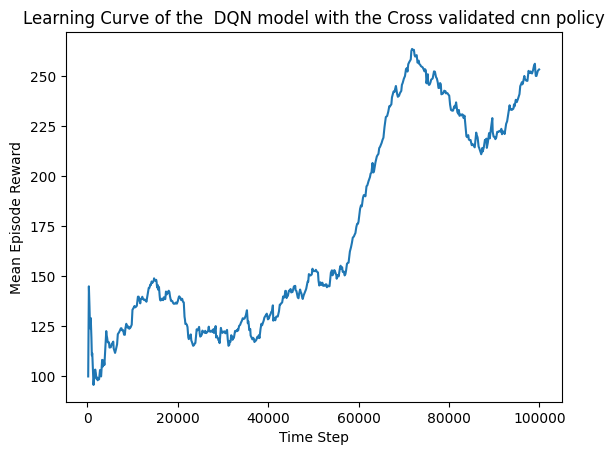

In [ ]:
event_file = log_dir + '/DQN_80'
event_acc = EventAccumulator(event_file)
event_acc.Reload()

# Get the list of available tags (summary keys)
#tags = event_acc.Tags()

# Retrieve the training episode rewards from the event files
episode_rewards = event_acc.Scalars('rollout/ep_rew_mean') # mean episode rewards
step = [episode.step for episode in episode_rewards]
reward = [episode.value for episode in episode_rewards]
### Plot the learning curve
plt.plot(step, reward)
plt.title('Learning Curve of the  DQN model with the Cross validated cnn policy')
plt.xlabel('Time Step')
plt.ylabel('Mean Episode Reward')

# Varying hyperparameters

In this section, we vary the hyperparameters and evaluate the mean episode reward and loss as the number of time_steps increase. In particular, we vary the

*   `batch_size` : number of samples used in each update step of the PPO algorithm.
* `gamma`: Discount factor.

In [ ]:
hyperparameters = {
    'batch_size': [128, 256],
    'gamma' : [0.9, 0.99]
}

dqn_rewards = {}

env = make_atari_env("ALE/SpaceInvaders-v5")

log_dir = 'dqn_log'

total_iterations = len(hyperparameters['batch_size']) * len(hyperparameters['gamma'])
iteration = 0

with tqdm(total=total_iterations, desc="Progress") as pbar:
    for batch_size in hyperparameters['batch_size']:
        for gamma in hyperparameters['gamma']:
            iteration += 1

            # Instantiate and train DQN model
            model = DQN("CnnPolicy", env=env, verbose=1, batch_size=batch_size, gamma=gamma, tensorboard_log=log_dir)

            # Train the model
            total_timesteps = 100000
            model.learn(total_timesteps=total_timesteps, tb_log_name=f"DQN_space_invaders_{batch_size}_{gamma}")
            model.save(f"DQN_model_{batch_size}_{gamma}")

            # Evaluate the trained model
            mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)
            print(f"Algorithm: DQN (CNN), Hyperparameters: batch_size={batch_size}, gamma={gamma}")
            print(f"Mean reward: {mean_reward:.2f}")

            event_file = log_dir + f"/DQN_space_invaders_{batch_size}_{gamma}_1"
            event_acc = EventAccumulator(event_file)
            event_acc.Reload()

            episode_rewards = event_acc.Scalars('rollout/ep_rew_mean')  # mean episode rewards
            reward = [episode.value for episode in episode_rewards]

            dqn_rewards[(batch_size, gamma)] = reward

            pbar.update(1)


Progress:   0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 14.13GB > 10.49GB
  warnings.warn(


Streaming output truncated to the last 5000 lines.
| rollout/            |          |
|    ep_len_mean      | 511      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 988      |
|    fps              | 192      |
|    time_elapsed     | 203      |
|    total_timesteps  | 39283    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 509      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 992      |
|    fps              | 192      |
|    time_elapsed     | 204      |
|    total_timesteps  | 39408    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 507      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.05     |
| time/               |          |
|   

Progress:  50%|█████     | 1/2 [1:03:52<1:03:52, 3832.07s/it]

Algorithm: DQN (CNN), Hyperparameters: batch_size=128, gamma=0.9
Mean reward: 230.50
Using cpu device
Wrapping the env in a VecTransposeImage.
Logging to dqn_log/DQN_space_invaders_256_0.9_1


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 14.13GB > 9.86GB
  warnings.warn(


Streaming output truncated to the last 5000 lines.
|    episodes         | 268      |
|    fps              | 221      |
|    time_elapsed     | 45       |
|    total_timesteps  | 10181    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 502      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 220      |
|    time_elapsed     | 46       |
|    total_timesteps  | 10284    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 503      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 276      |
|    fps              | 219      |
|    time_elapsed     | 47       |
|    total_timesteps  | 10497    |
----------------------------------
----

## Plot: Mean episode reward as number of time steps increase.

We can observe that our mean episode rewards display very similar patterns regardless of hyperparametets. It first plateaus before steadily increasing and reaching another plateau. However, its the level and time step of its transitions are different across different hyperparameters. For example, we can observe that for Batch Size 128 and Gamma 0.9, we achieve a relatively higher mean episode reward early relative to the rest, but it plateaus at a lower level relative to the rest after the second plateau.

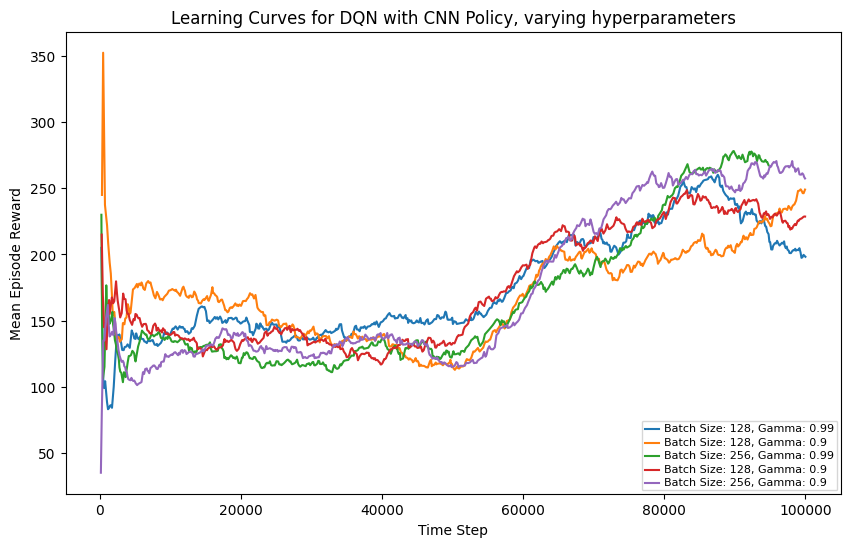

In [6]:
import matplotlib.pyplot as plt

log_dir = 'dqn_log'

filenames = [
    'DQN_space_invaders_128_0.99_2',
    'DQN_space_invaders_128_0.9_1',
    'DQN_space_invaders_256_0.99_1',
    'DQN_space_invaders_128_0.9_3',
    'DQN_space_invaders_256_0.9_1'
]

# Plot the learning curves for different hyperparameter combinations
plt.figure(figsize=(10, 6))
plt.title('Learning Curves for DQN with CNN Policy, varying hyperparameters')
plt.xlabel('Time Step')
plt.ylabel('Mean Episode Reward')

rewards = []

for filename in filenames:
    event_file = log_dir + '/' + filename
    event_acc = EventAccumulator(event_file)
    event_acc.Reload()

    episode_rewards = event_acc.Scalars('rollout/ep_rew_mean')  # mean episode rewards
    step = [episode.step for episode in episode_rewards]
    reward = [episode.value for episode in episode_rewards]

    rewards.append(reward)

    # Extract batch_size and gamma from the filename
    batch_size, gamma, _ = filename.split('_')[3:]

    label = f"Batch Size: {batch_size}, Gamma: {gamma}"
    plt.plot(step, reward, label=label)

legend = plt.legend(loc='lower right', prop={'size': 5})

for text in legend.get_texts():
    text.set_fontsize(8)

plt.show()


## Plot: Loss function as time steps increase.

The loss function can help us understand how the algorithm learns as it represents the objective function the algorithm is trying to minimize. We can observe that the algorithm encounters rapid fluctuations or spikes indicating that the model may be struggling to adapt to certain states. This occurs regardless of our hyperparameters, resulting in the noisy plot below.

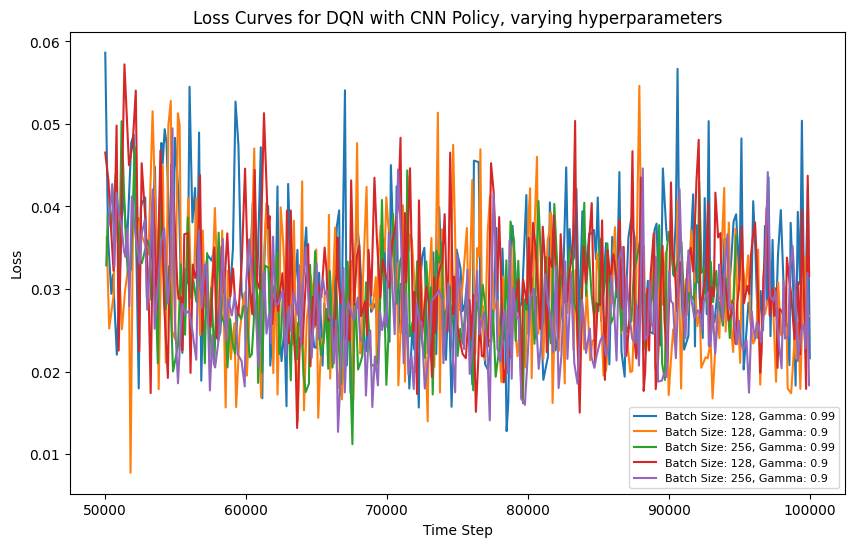

In [9]:

log_dir = 'dqn_log'

filenames = [
    'DQN_space_invaders_128_0.99_2',
    'DQN_space_invaders_128_0.9_1',
    'DQN_space_invaders_256_0.99_1',
    'DQN_space_invaders_128_0.9_3',
    'DQN_space_invaders_256_0.9_1'
]

plt.figure(figsize=(10, 6))
plt.title('Loss Curves for DQN with CNN Policy, varying hyperparameters')
plt.xlabel('Time Step')
plt.ylabel('Loss')

losses = []

for filename in filenames:
    event_file = log_dir + '/' + filename
    event_acc = EventAccumulator(event_file)
    event_acc.Reload()

    episode_losses = event_acc.Scalars('train/loss')  # training losses
    step = [episode.step for episode in episode_losses]
    loss = [episode.value for episode in episode_losses]

    losses.append(loss)

    # Extract batch_size and gamma from the filename
    batch_size, gamma, _ = filename.split('_')[3:]

    # Plot the loss curve for the hyperparameter combination
    label = f"Batch Size: {batch_size}, Gamma: {gamma}"
    plt.plot(step, loss, label=label)

legend = plt.legend(loc='lower right', prop={'size': 8})

for text in legend.get_texts():
    text.set_fontsize(8)

plt.show()
